### Imports and load
The code mounts Google Drive in the /content/drive directory, allowing access to files on notebook. Change the working directory to /content/drive/MyDrive/NLPShared/NLPDataSet, import necessary libraries, set a seed for reproducibility, and load a JSON, preparing data for further analysis and manipulation within the notebook.

In [ ]:
# Import essential libraries for data manipulation, visualization, and analysis
import json          # For handling JSON data files
import matplotlib.pyplot as plt  # For creating plots and visualizations
import pandas as pd   # For data manipulation and analysis with DataFrames
import numpy as np    # For numerical operations and array handling
import seaborn as sns # For statistical data visualization
import re            # For regular expression operations
import random        # For random number generation

# Set random seed for reproducibility of results across different runs
SEED = 7
np.random.seed(SEED)

In [ ]:
# Mount Google Drive to access dataset files stored in Google Drive
# This allows the notebook to read files from the user's Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Navigate to the dataset directory in Google Drive
import os
data_path = 'NLPShared/NLPDataSet'  # Define the relative path to the dataset folder
os.chdir(f'/content/drive/MyDrive/{data_path}')  # Change working directory to dataset location
os.getcwd()  # Display current working directory to confirm successful navigation

'/content/drive/.shortcut-targets-by-id/1y0GHdeQ9dVRUTbkgRg6ud2cWB79NiXU6/NLPShared/NLPDataSet'

The dataset is a JSON file and it consists of a set of documents.

In [ ]:
# Function to load different BeerQA dataset files
def load_BeerQA_dataset(name):
    """
    Load one of the three available BeerQA dataset files.
    
    Args:
        name (str): Type of dataset to load ('TRAIN', 'TEST', or 'QUESTIONS')
    
    Returns:
        dict: Loaded JSON data containing the dataset
    """
    # Dictionary mapping dataset names to their corresponding filenames
    dsts = {
        'TRAIN': 'beerqa_train_v1.0.json',      # Training dataset with questions, contexts, and answers
        'TEST': 'beerqa_dev_v1.0.json',         # Development/validation dataset
        'QUESTIONS': 'beerqa_test_questions_v1.0.json'  # Test questions without answers
    }
    
    filename = dsts[name]  # Get the filename for the requested dataset
    
    # Open and load the JSON file
    with open(filename, 'r') as file:
        return json.load(file)  # Return the parsed JSON data

# Introduction
In the introduction section, we start by visualizing the dataset. After that, we delve into some brief investigations related to indexing, embeddings, and clustering.

## Data exploration

### Printing some documents
This code will print the first document in a nicely formatted JSON format.


Each document includes its ID, the source, the question and the context (that typically provides background information relevant to the question).

In [ ]:
# Load all three BeerQA datasets for analysis and comparison
dataset = load_BeerQA_dataset('TEST')      # Load development/validation dataset
train = load_BeerQA_dataset('TRAIN')       # Load training dataset
test = load_BeerQA_dataset('QUESTIONS')    # Load test questions dataset

In [ ]:
# Utility functions for exploring and displaying dataset information

def print_first_document(dataset, dataset_name):
    """
    Print the first document from a dataset in formatted JSON.
    
    Args:
        dataset (dict): The dataset containing documents
        dataset_name (str): Name of the dataset for display purposes
    """
    print(dataset_name)
    # Print the 4th document (index 3) with proper JSON indentation for readability
    print(json.dumps(dataset['data'][3], indent=2)+"\n")

def print_num_documents(dataset, dataset_name):
    """
    Print the number of documents in a dataset.
    
    Args:
        dataset (dict): The dataset containing documents
        dataset_name (str): Name of the dataset for display purposes
    """
    num_documents = len(dataset['data'])  # Count documents in the 'data' field
    print("Number of documents", dataset_name + ":", num_documents)

In [ ]:
# Display the number of documents in each dataset to understand dataset sizes
print_num_documents(dataset, "DATASET")  # Development/validation dataset size
print_num_documents(train, "TRAIN")      # Training dataset size  
print_num_documents(test, "TEST")        # Test questions dataset size

Number of documents DATASET: 14121
Number of documents TRAIN: 134043
Number of documents TEST: 14932


We can see that the test set is composed just by questions.

In [ ]:
# Display sample documents from each dataset to understand data structure
print_first_document(dataset, "DATASET")  # Show sample from development dataset
print_first_document(train, "TRAIN")      # Show sample from training dataset  
print_first_document(test, "TEST")        # Show sample from test questions dataset

DATASET
{
  "id": "5a7e0582b269da476adcb07d7c81770aa7e40e36",
  "src": "squad",
  "answers": [
    "general appearance"
  ],
  "question": "What does the FBI employ the term race to summarize?",
  "context": [
    [
      "Race (human categorization)",
      "In an attempt to provide general descriptions that may facilitate the job of law enforcement officers seeking to apprehend suspects, the United States FBI employs the term \"race\" to summarize the general appearance (skin color, hair texture, eye shape, and other such easily noticed characteristics) of individuals whom they are attempting to apprehend. From the perspective of law enforcement officers, it is generally more important to arrive at a description that will readily suggest the general appearance of an individual than to make a scientifically valid categorization by DNA or other such means. Thus, in addition to assigning a wanted individual to a racial category, such a description will include: height, weight, eye color

### Visualization of some statistics
In this section we will plot some statistics about the dataset.

The plot illustrating the number of documents categorized by the number of contexts they contain.

In [ ]:
# Function to analyze the distribution of contexts per document
def count_documents_by_context(dataset):
    """
    Count how many documents have each number of contexts.
    This helps understand the distribution of context availability across documents.
    
    Args:
        dataset (dict): Dataset containing documents with context information
        
    Returns:
        dict: Dictionary mapping number of contexts to count of documents
    """
    context_counts = {}  # Dictionary to store context count frequencies
    
    # Iterate through each document in the dataset
    for document in dataset['data']:
        num_contexts = len(document['context'])  # Count contexts for this document
        
        # Update the frequency count for this number of contexts
        if num_contexts not in context_counts:
            context_counts[num_contexts] = 1  # First occurrence of this context count
        else:
            context_counts[num_contexts] += 1  # Increment existing count
            
    return context_counts

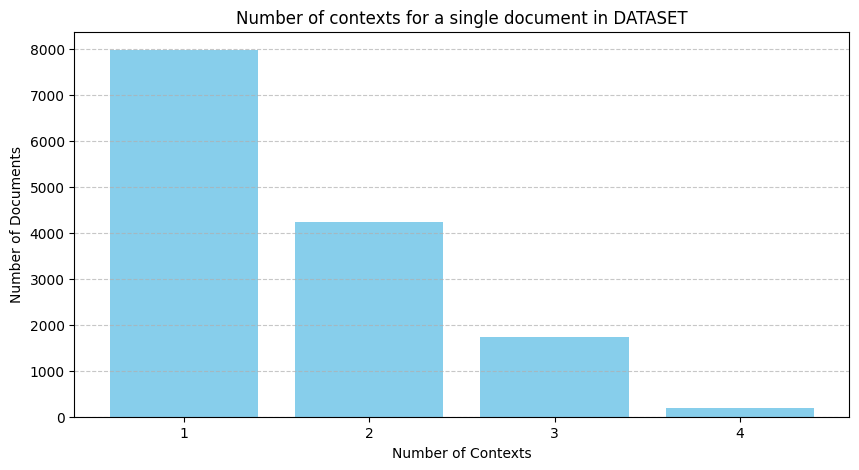

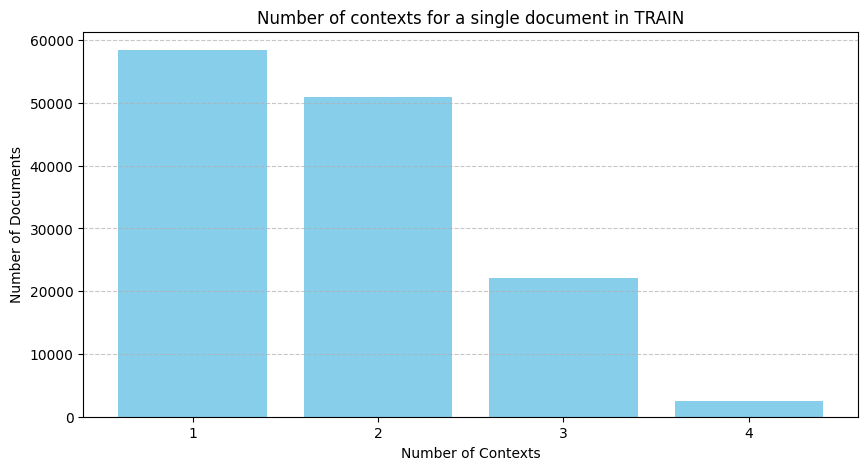

In [ ]:
# Visualize the distribution of contexts per document for both datasets
total_data = [dataset, train]  # List of datasets to analyze
sets = ["DATASET","TRAIN"]     # Names for labeling plots

# Create bar charts for each dataset showing context distribution
for i, data in enumerate(total_data):
    
    # Get the context count distribution for current dataset
    documents_by_context = count_documents_by_context(data)
    
    # Extract data for plotting
    num_contexts = list(documents_by_context.keys())    # X-axis: number of contexts
    counts = list(documents_by_context.values())        # Y-axis: number of documents
    
    # Create and customize the bar chart
    plt.figure(figsize=(10, 5))  # Set figure size
    plt.bar(num_contexts, counts, color='skyblue')  # Create bar chart
    plt.xlabel('Number of Contexts')                # X-axis label
    plt.ylabel('Number of Documents')               # Y-axis label  
    plt.title('Number of contexts for a single document in '+sets[i])  # Chart title
    plt.xticks(num_contexts)                       # Set x-axis ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
    plt.show()  # Display the plot

We compute the average length of questions and contexts for each dataset including the main dataset, training set, and test set. The results provide insights into the typical lengths of questions and contexts in the provided data.

In [ ]:
# Functions to compute average lengths of questions and contexts

def compute_average_question_length(dataset):
    """
    Calculate the average length of questions in a dataset.
    
    Args:
        dataset (dict): Dataset containing questions
        
    Returns:
        float: Average number of words per question
    """
    total_question_length = 0  # Accumulator for total word count
    num_documents = len(dataset['data'])  # Total number of documents
    
    # Iterate through each document and count question words
    for document in dataset['data']:
        question_length = len(document['question'].split())  # Split by whitespace and count
        total_question_length += question_length
    
    # Calculate and return average
    average_question_length = total_question_length / num_documents
    return average_question_length

def compute_average_context_length(dataset):
    """
    Calculate the average length of contexts per document in a dataset.
    
    Args:
        dataset (dict): Dataset containing contexts
        
    Returns:
        float: Average number of words per document across all contexts
    """
    total_context_length = 0  # Accumulator for total word count
    num_documents = len(dataset['data'])  # Total number of documents
    
    # Iterate through each document and count context words
    for document in dataset['data']:
        # Each context is an array of title-paragraph pairs
        for context_array in document['context']:
            # Each sentence in the context array
            for sentence in context_array:
                context_length = len(sentence.split())  # Split by whitespace and count
                total_context_length += context_length
    
    # Calculate average context length per document
    average_context_length = total_context_length / num_documents
    return average_context_length

In [ ]:
# Compute and display average lengths for all datasets
total_data = [dataset, train, test]      # All three datasets to analyze
sets = ["DATASET", "TRAIN", "TEST"]      # Corresponding dataset names

# Iterate through each dataset and compute statistics
for i in range(len(total_data)):
    print(sets[i])  # Display current dataset name
    
    # Calculate average context length (only for datasets that have contexts)
    # Note: TEST dataset contains only questions, no contexts
    if(i < 2):  # Only DATASET and TRAIN have contexts
        average_context_length = compute_average_context_length(total_data[i])
        print("Average Context Length: %.2f" % average_context_length)
    
    # Calculate average question length for all datasets
    average_question_length = compute_average_question_length(total_data[i])
    print("Average Question Length: %.2f" % average_question_length)
    print()  # Empty line for readability

DATASET
Average Context Length: 147.48
Average Question Length: 12.54

TRAIN
Average Context Length: 152.88
Average Question Length: 14.34

TEST
Average Question Length: 12.64



We perform also further investigation on the statistics of the answers and the contexts. So, we convert the "train" dataset (the bigger between "train" and "dataset") directly into a dataframe. This conversion doesn't produce a "fancy" dataframe, but we will change it later when it will be needed.

In [ ]:
# Convert the training dataset to a pandas DataFrame for easier analysis
# Using the training dataset as it's larger than the development dataset
df = pd.DataFrame(train['data'])  # Create DataFrame from the 'data' field
df.head(5)  # Display first 5 rows to inspect the structure

,id,src,answers,question,context
0,8af07575b8444ae748634478f96b00d4e7dbd170,squad,[1793],When did Wordsworth initially attack Burke?,"[[Edmund Burke, In the 19th century, Burke was..."
1,7e07be1a905b70f143b2c8aff00caf16e2b32b31,squad,[Investiture Controversy],The clash between Henry IV and the pope was pa...,"[[Middle Ages, During the early High Middle Ag..."
2,c9dfc01655bc5abc59a1ee2583c8b3f7fba6c2e2,squad,[the Thermidorian Reaction],What historical event brought about the fall o...,"[[Napoleon, Some contemporaries alleged that B..."
3,cf10ffbb5023cd0bc4637655458512b2186dc886,squad,[Morales],Who came up with a policy for indigenous auton...,"[[Indigenous peoples of the Americas, Morales ..."
4,0a185aca81f9e36bfb2486f690885011a6aefb2e,hotpotqa,[Darren Lynn Bousman],"Greg Hoffman was working on ""Saw III,"" a 2006 ...","[[Saw III, Saw III is a 2006 horror film direc..."


How many different answers we have in the dataset. We notice that most of them are simply "yes" and "no".

In [ ]:
# Extract the first answer from the answers list for each row
# In the original format, answers are stored as lists, but we need single values for analysis
for row in range(len(df)):
    # Extract the first (and typically only) answer from the answers list
    df.iloc[row]['answers'] = (df.iloc[row]['answers'])[0]

In [ ]:
# Analyze the distribution of different answers in the dataset
# This helps understand the types of answers and their frequency
answers_counts = df['answers'].value_counts()  # Count occurrences of each unique answer
print("Count of the different answers:")
print(answers_counts)  # Display the frequency distribution

Count of the different answers:
answers
no                   2477
yes                  2457
American              569
United States         256
two                   233
                     ... 
September 8, 2013       1
John Harrison           1
John Snow               1
Jornado                 1
March 11, 2010          1
Name: count, Length: 85200, dtype: int64


We notice that contexts are built by different pairs of *(title-paragraphs)*. So, we see if there are some possible overlaps between the titles. This means that:
* A topic can be used to give context to multiple questions.
* Even the same paragraph can be used to give context to multiple questions.

We see in the following cell that the first hypothesis is true, while we will confirm the second one later in the notebook.

In [ ]:
# Analyze the frequency of paragraph titles to identify topic overlap
# This investigates whether the same topics are used across multiple questions

paragraph_counts = {}  # Dictionary to store title frequency counts

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Each context array contains title-paragraph pairs
    for context_array in row['context']:
        paragraph_title = context_array[0]  # Extract the title (first element)
        
        # Count occurrences of each title
        if paragraph_title in paragraph_counts:
            paragraph_counts[paragraph_title] += 1  # Increment existing count
        else:
            paragraph_counts[paragraph_title] = 1   # Initialize new title count

# Sort titles by frequency in descending order for analysis
sorted_paragraph_counts = dict(sorted(paragraph_counts.items(), 
                                    key=lambda item: item[1], 
                                    reverse=True))

In [ ]:
# Display the top 10 most frequently occurring titles in the dataset
# This reveals which topics appear most often across different questions
print("Top 10 most recurrent titles in the dataset:")
for tcount in list(sorted_paragraph_counts.items())[:10]:  # Get first 10 items
    print(tcount[0], ":", tcount[1])  # Print title and its frequency count

Top 10 most recurrent titles in the dataset:
American Idol : 694
Frédéric Chopin : 656
New York City : 655
Queen Victoria : 632
Beyoncé : 584
New Haven, Connecticut : 555
2008 Sichuan earthquake : 448
Middle Ages : 442
Napoleon : 407
Muammar Gaddafi : 394


## Indexing and search

### Creation of the dataset for indexing
The dataset in its dictionary form is not suitable for indexing. So, some pre-processing is needed.



Every document has a `context` field, which is composed by one or more *title-paragraph* pairs. Thus, we have that every paragraph is associated with a title. From each document, we extract all the pairs of title and paragraph. Then, the indexing is performed on the obtained paragraphs.

In [ ]:
# Load and merge training and test datasets for comprehensive indexing
# This creates a combined dataset for building a complete search index

# Reload the datasets to ensure fresh data
train = load_BeerQA_dataset('TRAIN')  # Training dataset with Q&A pairs
test = load_BeerQA_dataset('TEST')    # Development/validation dataset

# Create a combined list of all documents for indexing
documentsTrain = []  # Array to hold all documents

# Add all training documents to the combined list
for item in train['data']:
    documentsTrain.append(item)

# Add all test documents to the combined list  
for item in test['data']:
    documentsTrain.append(item)

# Note: This provides maximum coverage for the search index
# by including contexts from both training and validation sets

In [ ]:
# Initialize a DataFrame to store title-paragraph pairs for indexing
# This will contain extracted (title, text) pairs from all contexts
docs_df = pd.DataFrame(columns=["docno", "title", "text"])
# docno: unique document identifier for indexing
# title: the topic/title of the paragraph  
# text: the actual paragraph content

In [ ]:
# Extract all title-paragraph pairs from the combined documents
# This processes each document's contexts to create individual searchable entries

pid = 0  # Counter for generating unique paragraph IDs

# Iterate through each document in the combined dataset
for doc in documentsTrain:
    # Each document can have multiple contexts (title-paragraph pairs)
    for con in doc['context']:
        title = con[0]  # Extract the title (first element of context array)
        text = con[1]   # Extract the paragraph text (second element)
        
        # Create a unique document identifier for this paragraph
        str_pid = "P" + str(pid)  # Format: P0, P1, P2, etc.
        
        # Create a new row for this title-paragraph pair
        tmp_df = pd.DataFrame([[str_pid, title, text]], columns=docs_df.columns)
        
        # Append this row to the main DataFrame
        docs_df = pd.concat([tmp_df, docs_df], ignore_index=True)
        
        # Increment the paragraph ID counter
        pid = pid + 1

# Result: docs_df contains all individual paragraphs with their titles and unique IDs

In [ ]:
# Convert DataFrame columns to appropriate string types for consistency
# This ensures all data types are properly set for downstream processing
docs_df = docs_df.convert_dtypes()  # Automatically infer and convert to best dtypes
docs_df.dtypes  # Display the resulting data types for verification

docno    string[python]
title    string[python]
text     string[python]
dtype: object

In [ ]:
# Configure pandas display options and show the processed dataset
pd.set_option('display.max_colwidth', 150)  # Set maximum column width for better readability
docs_df.head()  # Display the first few rows of the title-paragraph DataFrame

,docno,title,text
0,P259185,New Delhi,"After India gained independence in 1947, limited autonomy was conferred to New Delhi and was administered by a Chief Commissioner appointed by the..."
1,P259184,Asahi-Ryokuken Yomiuri Memorial,The Asahi-Ryokuken Yomiuri Memorial was a golf tournament on the Japan Golf Tour from 2004 to 2006. It was played in November at the Asoiizuka Gol...
2,P259183,Japanese yen,The is the official currency of Japan. It is the third most traded currency in the foreign exchange market after the United States dollar and the ...
3,P259182,Pat Ashton,"Pat Ashton (28 February 1931 – 23 June 2013) was an English actress. Her engaging cockney, blonde persona is best remembered for appearances in En..."
4,P259181,On the Buses (film),On the Buses is a 1971 British comedy film directed by Harry Booth and starring Reg Varney and Doris Hare. The film is the first spin-off film fro...


As stated before, we check if there are some duplicates over the paragraphs. Our hypothesis is that it is possible that the same paragraph is used to give context to more than one answer. We confirm that this is true.

In [ ]:
# Remove exact duplicate title-paragraph pairs to avoid redundancy in the index
# This improves search efficiency and prevents bias toward repeated content
clean_docs_df = docs_df.drop_duplicates(subset=['title','text'])  # Remove duplicates based on title and text
print(f'Found {len(docs_df)-len(clean_docs_df)} exact duplicates over {len(docs_df)} (title-paragraph) couples.')

Found 132395 exact duplicates over 259186 (title-paragraph) couples.


In [ ]:
# Save the cleaned DataFrame to CSV for future use and reproducibility
# This preserves the processed title-paragraph pairs for indexing
clean_docs_df.to_csv('title_text_clean_df.csv')


In conclusion, we see if there is a consistent overlap of titles even in the "clean" version. This means that the dataset contains more than one paragraph that is about the same topic.

In [ ]:
# Analyze title frequency in the cleaned dataset to understand topic distribution
# This shows how many different paragraphs exist for each topic/title
print(clean_docs_df.groupby(['title'])['title'].count().sort_values(ascending=False))

title
New York City       147
American Idol       127
Napoleon            102
Portugal            100
Greece               98
                   ... 
Gordie Tapp           1
Gordie Howe           1
Goran Ivanišević      1
Goran Dragić          1
Ṣād (surah)           1
Name: title, Length: 94489, dtype: int64


The most frequent title is "New York City". We display a sample of 5 paragraphs that have the city as title. We can observe that they are about different topics related to New York.

In [ ]:
# Display sample paragraphs about New York City to understand content diversity
# This shows how the same title can cover different aspects of a topic
clean_docs_df[clean_docs_df['title']=='New York City'].head(5)

,docno,title,text
22670,P236515,New York City,"The Fire Department of New York (FDNY), provides fire protection, technical rescue, primary response to biological, chemical, and radioactive haza..."
23513,P235672,New York City,"New York City is situated in the northeastern United States, in southeastern New York State, approximately halfway between Washington, D.C. and Bo..."
23790,P235395,New York City,HHC's facilities annually provide millions of New Yorkers services interpreted in more than 190 languages. The most well-known hospital in the HHC...
24064,P235121,New York City,"In 1904, the steamship ""General Slocum"" caught fire in the East River, killing 1,021 people on board. In 1911, the Triangle Shirtwaist Factory fir..."
24417,P234768,New York City,"The city's population in 2010 was 44% white (33.3% non-Hispanic white), 25.5% Black or African American (23% non-Hispanic black), 0.7% Native Amer..."


### Indexing with PyTerrier

#### Install and load PyTerrier


In [ ]:
# Install PyTerrier library for information retrieval and indexing
# PyTerrier provides efficient text indexing and retrieval capabilities
!pip install -q python-terrier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.6 MB/s eta 0:00:00
  Preparing metadata (setup

In [ ]:
# Import and initialize PyTerrier for text indexing and retrieval
import pyterrier as pt

# Initialize PyTerrier if not already started
# This sets up the Java backend required for indexing operations
if not pt.started():
    pt.init()

terrier-assemblies 5.9 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.10.1 has loaded Terrier 5.9 (built by craigm on 2024-05-02 17:40) and terrier-helper 0.0.8



#### Indexing the paragraphs
We perform the indexing operation on the paragraphs. We leave the title field as a sort of *label* which we will use later to evaluate the research.

In [ ]:
# Load the previously saved cleaned DataFrame for indexing
# This retrieves the processed title-paragraph pairs with duplicates removed
clean_docs_df = pd.read_csv("title_text_clean_df.csv", index_col=0)  # Load with first column as index
clean_docs_df = clean_docs_df.convert_dtypes()  # Ensure proper data types

In [ ]:
# Create a PyTerrier index from the cleaned paragraph data
# This builds an inverted index for efficient text retrieval

# Initialize the indexer with output directory and configuration
indexer = pt.DFIndexer("./index_rnddocs", overwrite=True, verbose=True)
# - "./index_rnddocs": directory where index files will be stored
# - overwrite=True: replace existing index if it exists
# - verbose=True: show progress during indexing

# Build the index using paragraph text and document IDs
index_ref = indexer.index(clean_docs_df["text"],     # Text content to index
                         clean_docs_df["docno"])     # Document identifiers

# Display the index reference for verification
index_ref.toString()

  0%|          | 0/126791 [00:00<?, ?documents/s]

16:01:21.462 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (P220052) - further warnings are suppressed
16:02:56.355 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 1 empty documents


'./index_rnddocs/data.properties'

In [ ]:
# Load the created index for querying and retrieval operations
# This provides access to the indexed data for search functionality
index = pt.IndexFactory.of(index_ref)

In [ ]:
# Display comprehensive statistics about the created index
# This provides insights into index size, vocabulary, and document collection
print(">>> INDEX STATISTICS <<<")
print(index.getCollectionStatistics().toString())
# Statistics include: total documents, unique terms, average document length, etc.

>>> INDEX STATISTICS <<<
Number of documents: 126791
Number of terms: 160512
Number of postings: 4800013
Number of fields: 0
Number of tokens: 5855754
Field names: []
Positions:   false



In [ ]:
# Display a sample of the index lexicon (vocabulary)
# This shows indexed terms and their associated statistics
print(">>> SOME LEXICON <<<")
lexicon = index.getLexicon()  # Get the vocabulary from the index

# Display first 5 terms in the lexicon with their statistics
for i in range(5):
    print(lexicon[i].getKey(),": ", lexicon[i].getValue().toString())
    # getKey(): the term string
    # getValue(): term frequency and document frequency statistics

>>> SOME LEXICON <<<
law :  term0 Nt=2360 TF=3397 maxTF=2147483647 @{0 4519806 6}
constitut :  term1 Nt=1031 TF=1397 maxTF=2147483647 @{0 2154926 6}
amend :  term2 Nt=291 TF=401 maxTF=2147483647 @{0 888059 1}
actual :  term3 Nt=696 TF=726 maxTF=2147483647 @{0 728487 4}
1966 :  term4 Nt=1264 TF=1363 maxTF=2147483647 @{0 245843 0}


#### Querying the index
We query the obtained index on some topics related to the most frequent titles.

To query the index, we use 3 pipelines, in which we mix some of the most important wighting scores:
* Top 100 results with BM25.
* Top 100 results with TF-IDF rescored with BM25.
* Top 100 results with PL2 rescored with BM25.

In [ ]:
# Create multiple retrieval pipelines using different weighting models
# This allows comparison of retrieval effectiveness across different approaches

# Base retrieval models with different scoring functions
pl2 = pt.BatchRetrieve(index, wmodel="PL2")        # Divergence from Randomness model
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")  # Term Frequency-Inverse Document Frequency
bm25 = pt.BatchRetrieve(index, wmodel="BM25")      # Best Matching 25 (Okapi BM25)

# Create hybrid pipelines that combine multiple weighting schemes
bm25_top100 = bm25 % 100                          # Top 100 results using BM25 only

# Two-stage retrieval pipelines: initial ranking + BM25 re-ranking
tf_idf_bm25_top100 = (tf_idf % 100) >> bm25       # TF-IDF first, then BM25 re-ranking
pl2_bm25_top100 = (pl2 % 100) >> bm25             # PL2 first, then BM25 re-ranking

# These pipelines allow testing different retrieval strategies for optimal performance

Since the length of the paragraphs is not huge, we perform the search directly on them, without using passages.
We perform a set of 3 queries related to the most frequent titles.


In [ ]:
queries = pd.DataFrame([["Q1", "Empire State Building"], ["Q2", "Simon Cowell"], ["Q3", "Saint Helena Island"]], columns=["qid", "query"])
bm25_top100_results = bm25_top100(queries)
tf_idf_bm25_top100_results = tf_idf_bm25_top100(queries)
pl2_bm25_top100_results = pl2_bm25_top100(queries)

#### Evaluation and visualization of the results
In our dataset, we don't have a set of queries paired with a set of relevance for our documents. So, we opted for a "visual" exploration and evaluation of the results.

We could create the relevance scores by assigning higher scores to paragraphs that contain the query or part of it, but it would be too artificial as it would not represent the real ground truth. For the same reason, it would be hard to create a model that learns to rank.

We visualize the top results for each query and for each pipeline.


In [ ]:
# Extract the top 5 results for every pipeline and query
bm25_top5 = bm25_top100_results.loc[(bm25_top100_results['rank'] >= 0) & (bm25_top100_results['rank'] <= 4)]
tf_idf_bm25_top5 = tf_idf_bm25_top100_results.loc[(tf_idf_bm25_top100_results['rank'] >= 0) & (tf_idf_bm25_top100_results['rank'] <= 4)]
pl2_bm25_top5 = pl2_bm25_top100_results.loc[(pl2_bm25_top100_results['rank'] >= 0) & (pl2_bm25_top100_results['rank'] <= 4)]

We check if the pipelines brought to a difference in the results. We see that the top 5 (at least in the ranking) is equal in all the pipelines.

In [ ]:
# Build a dataframe with all the values
compare_df = pd.DataFrame()
compare_df['query'] = bm25_top5['query'].values

# Adding bm25 values
compare_df['bm25_rank'] = bm25_top5['rank'].values
compare_df['bm25_docno'] = bm25_top5['docno'].values

# Adding tf_idf_bm25 values
compare_df['tf_idf_bm25_rank'] = tf_idf_bm25_top5['rank'].values
compare_df['tf_idf_bm25_docno'] = tf_idf_bm25_top5['docno'].values

# Adding pl2_bm25 values
compare_df['pl2_bm25_rank'] = pl2_bm25_top5['rank'].values
compare_df['pl2_bm25_docno'] = pl2_bm25_top5['docno'].values

In [ ]:
compare_df

,query,bm25_rank,bm25_docno,tf_idf_bm25_rank,tf_idf_bm25_docno,pl2_bm25_rank,pl2_bm25_docno
0,Empire State Building,0,P186217,0,P186217,0,P186217
1,Empire State Building,1,P69271,1,P69271,1,P69271
2,Empire State Building,2,P229516,2,P229516,2,P229516
3,Empire State Building,3,P241753,3,P241753,3,P241753
4,Empire State Building,4,P201512,4,P201512,4,P201512
5,Simon Cowell,0,P128332,0,P128332,0,P128332
6,Simon Cowell,1,P223701,1,P223701,1,P223701
7,Simon Cowell,2,P46020,2,P46020,2,P46020
8,Simon Cowell,3,P234060,3,P234060,3,P234060
9,Simon Cowell,4,P186930,4,P186930,4,P186930


Now we display the top 5 articles for every query. We perform the operation only on `bm_25` since the results of the top were equal.

In [ ]:
# Merge back results with the original paragraphs
bm25_top5 = pd.merge(bm25_top5, clean_docs_df, on="docno", how="inner")
tf_idf_bm25_top5 = pd.merge(tf_idf_bm25_top5, clean_docs_df, on="docno", how="inner")
pl2_bm25_top5 = pd.merge(pl2_bm25_top5, clean_docs_df, on="docno", how="inner")

In [ ]:
bm25_top5

,qid,docid,docno,rank,score,query,title,text
0,Q1,52717,P186217,0,22.397809,Empire State Building,Empire State Building,The Empire State Building is a 102-story Art D...
1,Q1,105429,P69271,1,18.569970,Empire State Building,Hoboken City Hall,"Hoboken City Hall, is located in Hoboken, Huds..."
2,Q1,21704,P229516,2,17.815158,Empire State Building,Chrysler Building,The Chrysler Building is an Art Deco–style sky...
3,Q1,12433,P241753,3,17.563708,Empire State Building,Asante Traditional Buildings,Asante Traditional Buildings is a World Herita...
4,Q1,42963,P201512,4,17.435669,Empire State Building,Accrington,Accrington is a former centre of the cotton an...
5,Q2,82649,P128332,0,26.899530,Simon Cowell,Fanfare Records,Fanfare Records was a British record label tha...
6,Q2,26517,P223701,1,25.816626,Simon Cowell,American Idol,A special tribute to Simon Cowell was presente...
7,Q2,113182,P46020,2,24.639272,Simon Cowell,X Factor (Belgian TV series),X Factor was the Flemish version of the Britis...
8,Q2,17705,P234060,3,21.560329,Simon Cowell,Simon Cowell,Simon Phillip Cowell ( ; born 7 October 1959) ...
9,Q2,52311,P186930,4,21.458769,Simon Cowell,Factor X (Portuguese TV series),Factor X was the Portuguese version of the tel...


### Bubbleplot of results

Creation of a bubble plot where the most frequent labels in the results correpsond to the biggest bubbles. We use them to visually compare the results of the different pipelines.

#### BubbleChart Class
The BubbleChart class is taken from the official website of Matplotlib and it has been modified to suit our results.

*Credits: [Matplotlib library](https://matplotlib.org/stable/gallery/misc/packed_bubbles.html#sphx-glr-gallery-misc-packed-bubbles-py)*

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import minmax_scale

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        # ADDED: sort colors in decreasing order
        alpha = np.linspace(10, 100, num=len(area)-1, endpoint=False)
        alpha = -np.sort(-alpha)
        colors = [mcolors.CSS4_COLORS['cornflowerblue']]
        for i in range(len(alpha)):
          colors.append(colors[0]+str(int(alpha[i])))

        # ADDED: sort fontsizes
        self.fonts = minmax_scale(area, (6,12))

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2
        self.colors = colors

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=self.colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center', fontsize=self.fonts[i])

#### Aggregation of the results
For each pipeline and query, we aggregate the results to see which is the most impacting title in the results.

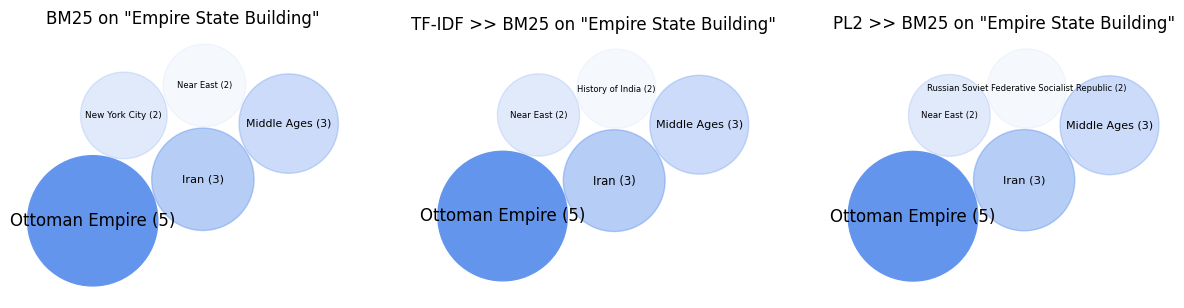

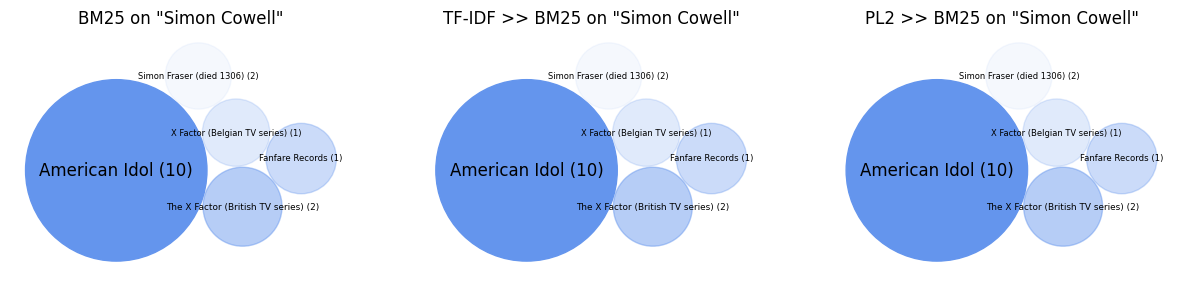

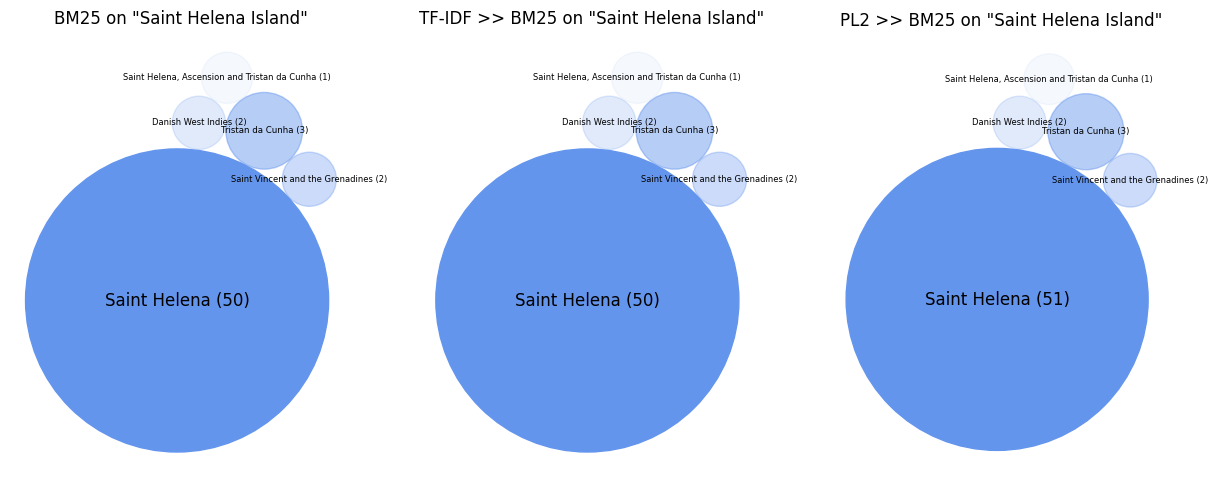

In [ ]:
results = [bm25_top100_results, tf_idf_bm25_top100_results, pl2_bm25_top100_results]
titles = ["BM25","TF-IDF >> BM25","PL2 >> BM25"]

# For each query
for q in queries['qid']:

  fig, axs = plt.subplots(1,3,figsize=(15, 15),subplot_kw=dict(aspect="equal"))

  # For each result
  for idx in range(len(results)):

    # Extraction, merge and filtering for query
    tmp = results[idx]
    tmp = pd.merge(tmp, clean_docs_df, on="docno", how="inner")
    tmp = tmp[tmp['qid'] == q]

    # Aggregation of results
    tmp = tmp.groupby("title").agg({
        "qid": "count",  # Count the rows
        "score": "sum"   # Sum the "score" column
    }).reset_index()

    # Sort in decreasing order
    tmp = tmp.sort_values('score', ascending=False)

    # Top 5 labels
    top_labels = tmp['title'].to_numpy()[:5] + " (" + tmp['qid'].to_numpy().astype(str)[:5] +")"
    top_scores = tmp['score'].to_numpy()[:5]

    # Plot
    bubble_chart = BubbleChart(area = top_scores, bubble_spacing=0.1)
    bubble_chart.collapse()
    bubble_chart.plot(axs[idx], top_labels)
    axs[idx].axis("off")
    axs[idx].relim()
    axs[idx].autoscale_view()
    axs[idx].set_title(titles[idx] + " on \"" + queries[queries['qid'] == q].iloc[0]['query'] + "\"")

  plt.show()

In the first search, we see that maybe it was given more importance to the word "Empire", so "New York City" is not the most frequent title. Then, "American Idol" is correctly tied with its creator "Simon Cowell", while it seems that there is no link between "Napoleon" and the island where he went into exile.

## Word embeddings

Word embeddings allow us to transform words into a high-dimensional space where semantically similar words are positioned closer together. So, we can capture the context and relationships between words.

Visualizing word embeddings can provide insights into these semantic relationships that we can exploit in the following steps, when we will train machine learning models. Then, we will visualize a sample of these embeddings, to eventually observe clusters of similar words.


### Preparing for Word2Vec: tokenization
We take into account answers, questions and contexts.


In [ ]:
import re
from pandas.core.common import flatten

# Assuming documentsTrain is a list of dictionaries, where each dictionary
# contains the following "interesting" keys

string_keys = ["answers", "question", "context"]
sentences = []

# Iterate over each document in documentsTrain
for document in documentsTrain:

    for key in string_keys:

        if key != "question":

            flattened_values = flatten(document[key])

            for value in flattened_values:

                # Ensure value is a string
                if isinstance(value, str):

                    # # Split at any punctuation between [?!.]
                    value_sentences = re.split(r'[?!.]\s?', value)
                    sentences.extend(value_sentences)

        else:

            # Split at any punctuation between [?!.]
            value_sentences = re.split(r'[?!.]\s?', document[key])
            sentences.extend(value_sentences)

# Now 'sentences' contains all the split sentences from the specified keys across all documents
print("Total sentences:", len(sentences))

Total sentences: 1903149


We print a sample of the splitted sentences.

In [ ]:
# Print a sample of the split sentences
num_samples = 10  # Number of sentences to print as a sample
print(f"Sample of {num_samples} sentences:")
for i in range(min(num_samples, len(sentences))):
    print(f"Sentence {i + 1}: {sentences[i]}")

Sample of 10 sentences:
Sentence 1: 1793
Sentence 2: When did Wordsworth initially attack Burke
Sentence 3: 
Sentence 4: Edmund Burke
Sentence 5: In the 19th century, Burke was praised by both liberals and conservatives
Sentence 6: Burke's friend Philip Francis wrote that Burke "was a man who truly & prophetically foresaw all the consequences which would rise from the adoption of the French principles", but because Burke wrote with so much passion, people were doubtful of his arguments
Sentence 7: William Windham spoke from the same bench in the House of Commons as Burke had when he had separated from Fox and an observer said Windham spoke "like the ghost of Burke" when he made a speech against peace with France in 1801
Sentence 8: William Hazlitt, a political opponent of Burke, regarded him as amongst his three favourite writers (the others being Junius and Rousseau) and made it "a test of the sense and candour of any one belonging to the opposite party, whether he allowed Burke to be

Some empty sentences are left, so we remove them whilw we tokenize each sentence into single words.

In [ ]:
# Tokenize sentences and filter out single-word sentences
tokenized_sentences = [
    re.sub(r'\W', ' ', sentence).lower().split()
    for sentence in sentences
    if len(re.sub(r'\W', ' ', sentence).split()) > 1
]

#Print a sample of tokenized sentences
num_samples = 10  # Number of sentences to print as a sample
print(f"Sample of {num_samples} tokenized sentences:")
for sentence in tokenized_sentences[:num_samples]:
  print(sentence)

Sample of 10 tokenized sentences:
['when', 'did', 'wordsworth', 'initially', 'attack', 'burke']
['edmund', 'burke']
['in', 'the', '19th', 'century', 'burke', 'was', 'praised', 'by', 'both', 'liberals', 'and', 'conservatives']
['burke', 's', 'friend', 'philip', 'francis', 'wrote', 'that', 'burke', 'was', 'a', 'man', 'who', 'truly', 'prophetically', 'foresaw', 'all', 'the', 'consequences', 'which', 'would', 'rise', 'from', 'the', 'adoption', 'of', 'the', 'french', 'principles', 'but', 'because', 'burke', 'wrote', 'with', 'so', 'much', 'passion', 'people', 'were', 'doubtful', 'of', 'his', 'arguments']
['william', 'windham', 'spoke', 'from', 'the', 'same', 'bench', 'in', 'the', 'house', 'of', 'commons', 'as', 'burke', 'had', 'when', 'he', 'had', 'separated', 'from', 'fox', 'and', 'an', 'observer', 'said', 'windham', 'spoke', 'like', 'the', 'ghost', 'of', 'burke', 'when', 'he', 'made', 'a', 'speech', 'against', 'peace', 'with', 'france', 'in', '1801']
['william', 'hazlitt', 'a', 'political'

### Creation of Word2Vec


In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(tokenized_sentences, vector_size=30, min_count=5, window=10)

### Visualising the most similar embedding vectors to a random one using T-SNE

We select a term at random, identify the 10 terms most closely related to it, and then employ t-SNE to visualize these terms in a compressed space alongside additional terms.

In [ ]:
sentence = np.random.choice(len(tokenized_sentences))
term = np.random.choice(len(tokenized_sentences[sentence]))
term = tokenized_sentences[sentence][term]
print(f"Random term: {term}")

Random term: that


In [ ]:
# Top 10 similar terms
top_similar = model.wv.most_similar(term)
top_similar

[('not', 0.87931227684021),
 ('this', 0.8559409976005554),
 ('which', 0.8548039793968201),
 ('already', 0.7880597710609436),
 ('what', 0.7859000563621521),
 ('why', 0.7827845811843872),
 ('if', 0.7793684005737305),
 ('so', 0.769801676273346),
 ('never', 0.7534703016281128),
 ('however', 0.7508034110069275)]

We'll now visualise some of the word vectors in a 3 dimensional space using t-SNE. We choose a random subset of 200 terms to show. We add the most similar terms to it.

In [ ]:
# Random sample
sample = np.random.choice(list(model.wv.key_to_index), size = 200, replace = False)

# List of most similar words
top_similar_list = [e[0] for e in top_similar]

# Merge everything and remove duplicates (while keeping the order)
sample = [term] + top_similar_list + list(sample)
sample = list(dict.fromkeys(sample))
print(f"Obtained size {len(sample)} sample: {sample}")

Obtained size 211 sample: ['that', 'not', 'this', 'which', 'already', 'what', 'why', 'if', 'so', 'never', 'however', 'moja', 'continuities', 'rashaan', 'ecclesiastic', 'felicity', 'evertsen', 'credit', 'mosby', 'residencies', 'coneflowers', 'malfunctions', 'cursus', 'urchins', 'lap', 'licences', 'asano', 'exupéry', 'carnivora', 'coffey', 'suva', 'parry', 'ricafort', 'smarter', 'mcdonagh', 'transcon', 'resemblance', 'pornographer', 'daryl', 'marggraf', 'trager', 'rambow', '917', 'julavits', 'becker', 'bouquet', 'mcauliffe', 'knope', 'covid', 'kbnt', 'alaskan', 'milner', 'fgfa', 'gun', 'uptight', 'coroner', 'vollmann', 'paz', 'fadel', 'stink', 'metros', 'calothamnus', 'wjar', 'mussaenda', 'ofab', 'interpolations', 'pomegranates', 'bedevilled', 'nez', 'bénédict', 'joslyn', '003', 'polyphenolics', 'volyn', 'scans', 'sisman', 'mercian', 'peasantry', 'vanna', 'rossabi', 'rizzio', 'kandy', 'aujourd', 'buccirosso', 'surgeon', 'singlet', 'ascoli', 'audience', 'playable', 'bosh', 'rotta', 'yoel'

Then, we apply T-SNE in 3 dimensions and we plot the result.

In [ ]:
from sklearn.manifold import TSNE

word_vectors = model.wv[sample]
tsne = TSNE(n_components=3, n_iter=2000)
tsne_embedding = tsne.fit_transform(word_vectors)

In [ ]:
# Turn the embedding into a dataframe and add plot info
plot_df = pd.DataFrame(tsne_embedding, columns = ["x","y","z"])
plot_df['word'] = sample
plot_df['label'] = [term] + ["Similar words" for i in range(10)] + ["Other words" for i in range(200)]
plot_df.head(15)

,x,y,z,word,label
0,-29.879583,-172.704910,41.675213,that,that
1,-17.808567,-179.925919,7.343501,not,Similar words
2,-36.877388,-144.568878,26.361629,this,Similar words
3,-60.885159,-161.250687,41.279015,which,Similar words
4,15.246895,-142.012131,43.625614,already,Similar words
5,-46.237370,-144.636307,65.549553,what,Similar words
6,-2.773897,-179.327850,67.947113,why,Similar words
7,-8.412145,-206.669205,28.790575,if,Similar words
8,19.384031,-180.981110,32.033131,so,Similar words
9,24.427824,-160.653320,12.183894,never,Similar words


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In the plot we can see that the most similar words are close to the traget one, but some of them are not. This can be due to the dimensionality reduction performed by T-SNE.

In [ ]:
fig = px.scatter_3d(plot_df, x='x',y='y',z='z',text='word',color='label')
fig.update_traces(marker=dict(size=3,line=dict(width=2)),textfont_size=8)
fig.show()

## Clustering


We try clustering to group similar paragraphs into clusters, to discover if there are any underlying patterns. As it was done in the indexing part, we use titles as labels, to validate the coherence and relevance of the clusters formed.

### Data load and transformation.

In [ ]:
# Load the cleaned dataframe
clean_docs_df = pd.read_csv("title_text_clean_df.csv", index_col=0)
clean_docs_df = clean_docs_df.convert_dtypes()

In [ ]:
# Put the titles and the contexts in two different lists
labels = clean_docs_df['title'].to_list()
ctx = clean_docs_df['text'].to_list()

### Vectorization
The `TfidfVectorizer` is designed to transform a list of contexts into a vector by calculating the term frequency and then multiplying it by the inverse document frequency of the term throughout the corpus. The result is a weighted value for each term in the vector representation.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

Obtain the vocabs of the dataset and the vector form of them.

In [ ]:
vector_documents = vectorizer.fit_transform(ctx)

In [ ]:
vocab = vectorizer.get_feature_names_out()
print(f"Length of vocabulary: {len(vocab)}")

Length of vocabulary: 48932


In [ ]:
#Average document vocabulary size
nonzero_count = vector_documents.count_nonzero()
doc_count = vector_documents.get_shape()[0]

print(f"Average document vocabulary size: {nonzero_count/doc_count}")

Average document vocabulary size: 35.73356241880736


Show the vocabs of the first document and their vector form.

In [ ]:
sorted([(vocab[j], vector_documents[0, j]) for j in vector_documents[0].nonzero()[1]], key=lambda x: -x[1])

[('precession', 0.36153082427438443),
 ('hipparchus', 0.3570373935778353),
 ('trigonometry', 0.34632118862622285),
 ('nicaea', 0.34339319106228217),
 ('geographer', 0.31869458231714626),
 ('incidental', 0.3046046680682582),
 ('astronomer', 0.26676145285010466),
 ('mathematician', 0.24189071716238056),
 ('discovery', 0.22359322263345205),
 ('greek', 0.1920024207527866),
 ('founder', 0.18257213030295144),
 ('famous', 0.18100669717034304),
 ('considered', 0.16426994544801274)]

We plot the similarity between the first 10 documents. We see that we have higher similarity with documents that have the same title.

In [ ]:
similarity = np.zeros((10, 10))
for i in range(0,10):
  for j in range (0,10):
    similarity[i][j] = vector_documents[i].multiply(vector_documents[j]).sum()

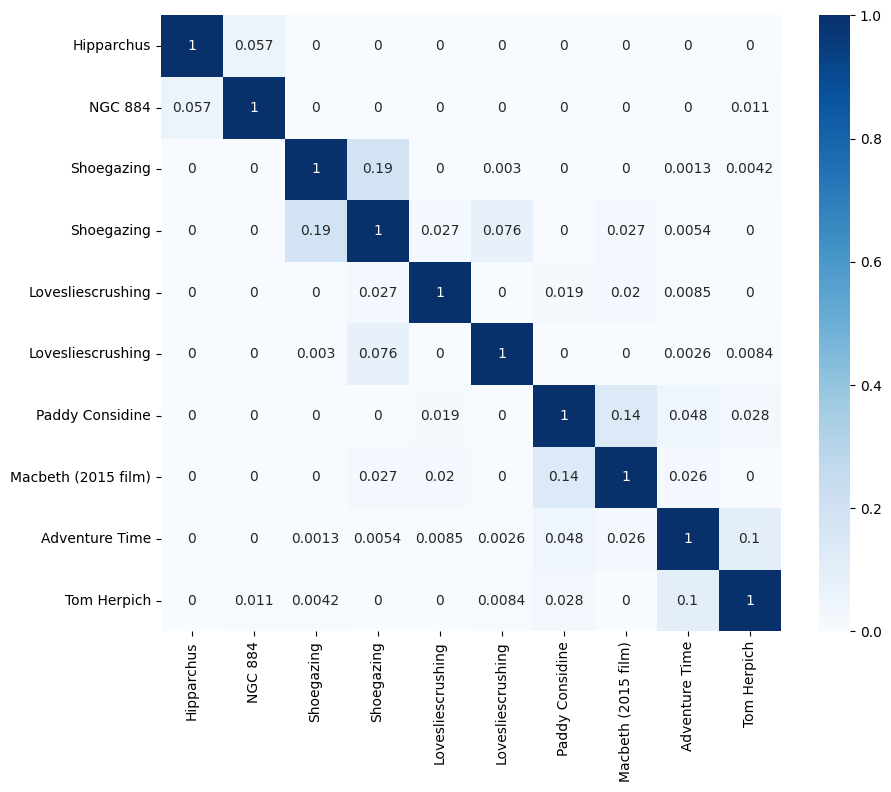

In [ ]:
#Plot the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity, cmap='Blues', annot=True, xticklabels=labels[0:10], yticklabels=labels[0:10])
plt.show()

### Clustering


We use the minibatch Kmeans to itereate the procedure over a different number of cluster, to find the best value. Then, we use KMeans with the best number of clusters.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

mini_inertia = []

for i in range (1,100):
  mb_kmeans = MiniBatchKMeans(n_clusters=i,batch_size=1500, random_state=2307)
  mb_kmeans.fit(vector_documents)
  mini_inertia.append(mb_kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



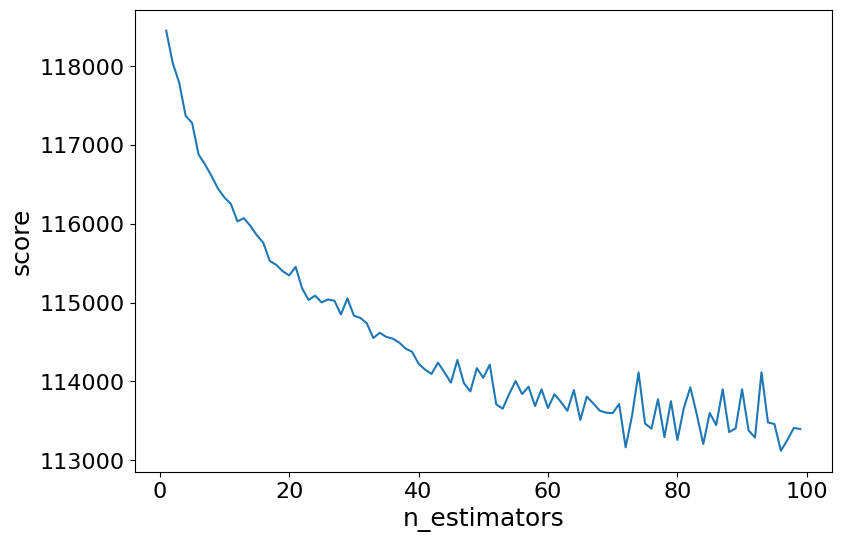

In [ ]:
my_mini_range = range(1, 100)

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(my_mini_range, mini_inertia)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

There is no clear knee in the graph, but the inertia starts to stall and become irregular after 60, so we select 50 clusters as a trade-off.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50, max_iter=100, n_init=2, verbose=False, random_state=2307)
kmeans.fit(vector_documents)

KMeans(max_iter=100, n_clusters=50, n_init=2, random_state=2307, verbose=False)

By showing the most important vocabs of the first five clusters we see if they are consistent.

In [ ]:
for i in range (0,5):
  print('Cluster number : ' + str(i))
  centroid = kmeans.cluster_centers_[i]
  sorted_terms = centroid.argsort()[::-1]
  print([vocab[j] for j in sorted_terms[:20]])

Cluster number : 0
['used', 'known', 'time', 'new', 'group', 'world', 'based', 'people', 'years', 'including', 'called', 'year', 'use', '000', 'state', 'later', 'city', 'high', 'government', 'work']
Cluster number : 1
['director', 'film', 'screenwriter', 'producer', 'films', 'born', 'american', 'actor', 'writer', 'best', 'known', 'television', 'directed', 'directing', 'november', 'august', 'work', 'december', 'january', 'february']
Cluster number : 2
['league', 'season', 'baseball', 'hockey', 'team', 'cup', 'club', 'played', 'professional', 'major', 'football', 'nhl', 'national', 'mlb', 'player', 'ice', 'games', 'premier', 'won', 'teams']
Cluster number : 3
['music', 'musical', 'composer', 'country', 'american', 'songs', 'lyrics', 'known', 'artists', 'records', 'group', 'dance', 'rock', 'born', 'pop', 'singer', 'albums', 'classical', 'producer', 'record']
Cluster number : 4
['book', 'novel', 'published', 'books', 'author', 'comics', 'fiction', 'comic', 'writer', 'novels', 'american', '

Show the title of twenty documents in the same cluster.

In [ ]:
kmeans_labels = kmeans.labels_
for i in range (0,5):
  print('Cluster number : ' + str(i))
  centroid = kmeans.cluster_centers_[i]
  count = 0
  j = 0
  while (count < 20) :
    if (kmeans_labels[j] == i):
      print(labels[j] + ' |',  end=" ")
      count = count + 1
      j = j + 1
    j = j + 1

Cluster number : 0
Hipparchus | Shoegazing | Lovesliescrushing | Committee on Human Rights in the USSR | Memory | Religion in ancient Rome | Database | Hans Christian Andersen | Prashna Upanishad | Dodonaea | Kanye West | Meet Me in St. Louis | Lighting | Ethan Hardy | RLLMUK | Greater Talent Network | Jeremy Paxman | Department store | Mary, mother of Jesus | Wile E. Coyote and the Road Runner | Cluster number : 1
Lionel Friedberg | Michael Meredith | Armand Schaefer | Edward L. Cahn | Peter Chung | Shane Acker | Bill Kenwright | Sergio Leone | Gene Kranz | Ernst Lubitsch | Chris Harris (actor) | Rashida Jones | Léonce Perret | Jean Dréville | Satyajit Ray filmography | Min Kyu-dong | Manfred Noa | Arturo Ripstein | Joseph Ruben | John Huston | Cluster number : 2
David Hillier | 1929 Segunda División | 2017–18 Serie B | 2016–17 Serie B | Barry Larkin | 2001 Intercontinental Cup | Dayton Demonz | 2011 Minnesota Vikings season | Eddie Epstein | 2014 NBA Development League expansion draf

Transform the high dimensional data into 3 dimensional data using the Singular Value Decomposition and plot them using the labels learned by the kmeans algorithm. Despite the large number of clusters, some areas with dominant color can be seen in the plot.

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(3)
reduced_data = svd.fit_transform(vector_documents)

[x,y,z] = np.transpose(reduced_data)

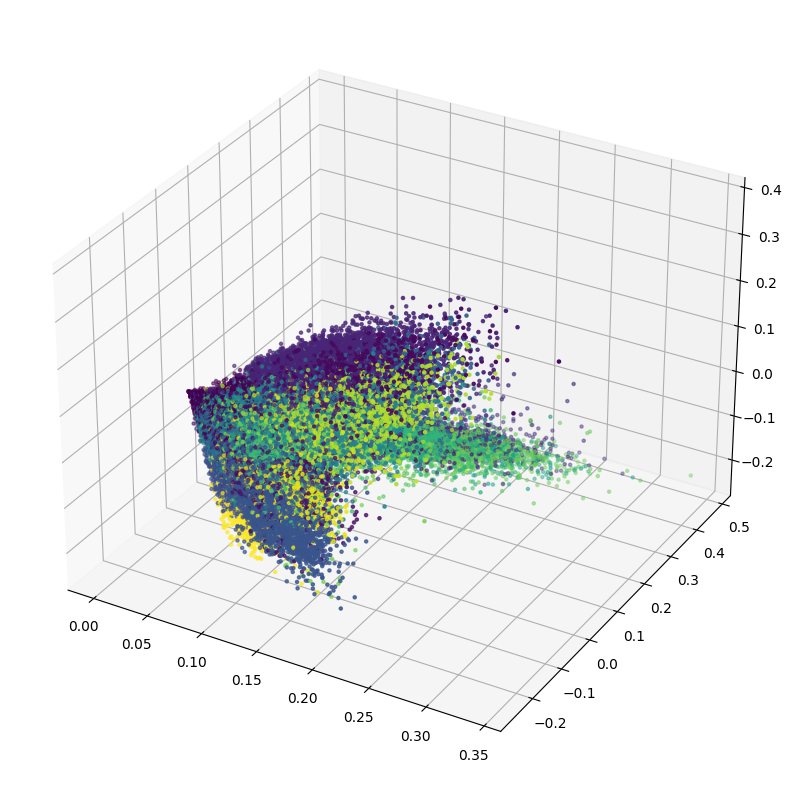

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=kmeans.labels_, marker='.')

# Question Answering Task Implementation
In this section, we perform the Question Answering task. We start by fine tuning a generic model on the task, then we compare different fine-tuned models, and finally we further fine-tune a model on the BeerQA dataset.

*The following section is largely based on materials, tutorials and networks available on [Hugging Face](https://huggingface.co/).*


What is the definition of Question Answering? According to Hugging Face:

> Question answering is a task that returns an answer to a question, sometimes with context (open-domain) and other times without context (closed-domain).

Within the Question Answering task, we can find the following taxonomy:
* **Extractive**, when the answer to the question is a span of the given context.
* **Abstractive**, when the answer is generated from the given context.

The generation of the response is therefore composed of two phases: a first **search phase**, where the best context from which to extract the answer is found, and a second in which **the model is asked** to "answer given the context".




## Evaluation functions
The following functions calculate the evaluation metrics (**Exact Match** and **F1 Score**) with which Question Answering systems are usually evaluated.

*Credits: [fastforwardlabs.com](https://qa.fastforwardlabs.com/no%20answer/null%20threshold/bert/distilbert/exact%20match/f1/robust%20predictions/2020/06/09/Evaluating_BERT_on_SQuAD.html#Exact-Match:~:text=Below%20are%20some%20functions%20we%27ll%20need%20to%20compute%20our%20quality%20metrics.)*

In [ ]:
def normalize_text(s):
    """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps."""
    import string, re

    def remove_articles(text):
        regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
        return re.sub(regex, " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))

def compute_exact_match(prediction, truth):
    return int(normalize_text(prediction) == normalize_text(truth))

def compute_f1(prediction, truth):
    pred_tokens = normalize_text(prediction).split()
    truth_tokens = normalize_text(truth).split()

    # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
    if len(pred_tokens) == 0 or len(truth_tokens) == 0:
        return int(pred_tokens == truth_tokens)

    common_tokens = set(pred_tokens) & set(truth_tokens)

    # if there are no common tokens then f1 = 0
    if len(common_tokens) == 0:
        return 0

    prec = len(common_tokens) / len(pred_tokens)
    rec = len(common_tokens) / len(truth_tokens)

    return 2 * (prec * rec) / (prec + rec)

## Dataset preparation
In this section we define different functions that we use to define the splits (train, validation and test) that we use through the next sections.

The definition of the splits as sub-samples of the original dataset is mainly due to the fact that the number of documents at our disposal is very high and proved to be prohibitive given the resource limits imposed by colab. In any case, the portion of data that we temporarily put aside will be useful in the last part of the notebook.

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

def get_hugging_dataset(name):
  return load_dataset(name)

The following function returns 3 splits of a given dataset:
`train_data`, `test_data`, `residual_data`. It will be called twice: to create the main dataset splits and to take a sub-sample of the test set.

In [ ]:
from sklearn.model_selection import train_test_split

#  Returns a split of the given dataset
#  dataset: the loaded "raw" dataset.
#  Returns 3 lists of dictionaries: the train one, the test one and the residual
def get_train_test_residual_split(dataset,residual_size,return_test=True,test_size=0.2,seed=7):

  # Step 1: take a subsample of the original dataset
  # Stratification by the dataset source
  to_split = dataset['data']
  stratify_key = [doc['src'] for doc in to_split]
  train_test_data, residual_data = train_test_split(to_split, test_size=residual_size, random_state=seed, stratify=stratify_key)

  if not return_test:
    return train_test_data

  # Step 2: take a subsample of the train_test
  # Stratification by the dataset source
  to_split = train_test_data
  stratify_key = [doc['src'] for doc in to_split]
  train_data, test_data = train_test_split(to_split, test_size=test_size, random_state=seed, stratify=stratify_key)

  return train_data, test_data, residual_data

The following function is needed to remove questions from our BeerQA dataset that are also in SQUAD V2. This is because in the following sections we will use models that have already been fine-tuned on SQUAD V2 and fine-tuning these models on the same questions again would be of little use as well as detrimental in calculating performance.

In [ ]:
#  Removes elements that are in SQUADV2.
#  old_data: a list of dictionaries.
#  Returns a list of dictionaries.
def remove_squad_v2(old_data,verbose=False):

  new_data = []

  # Get list of questions in SquadV2
  to_remove = get_hugging_dataset("squad_v2")
  already_posed_questions = to_remove['train']['question']
  # Normalizing the questions
  already_posed_questions = [normalize_text(s) for s in already_posed_questions]

  counter = 0
  for doc in old_data:
    if doc['src'] == 'squad':
      question = normalize_text((doc.copy())['question'])
      if question not in already_posed_questions:
        new_data.append(doc)
      else:
        counter = counter + 1
    else:
      new_data.append(doc)

  if verbose:
    print(f'Removed {counter} questions of SQUAD V2 dataset')

  return new_data

This last support function takes care of combining the titles and paragraphs of the various contexts into a single string.

In [ ]:
#  Returns a dataset with the merged contexts in one.
#  train_set: the loaded "raw" dataset.
#  Returns a list of dictionaries.
def get_data_with_merged_contexts(train_set):
  new_train = []

  for doc in train_set['data']:

    # id, title, context, question, answer
    new_doc = {}
    new_doc['id'] = doc['id']

    # Concatenating all the contexts
    titles = []
    contexts = []
    for tp in doc['context']:
      # Verify if the title is in the paragraph, otherwise merge it
      title = tp[0]
      paragraph = tp[1]
      if title not in paragraph:
        paragraph = title + ': ' + paragraph
      contexts.append(paragraph)
      titles.append(title)

    if len(contexts) > 1:
      new_title = "; ".join(set(titles))
      new_context = "\n".join(contexts)
    else:
      new_title = titles[0]
      new_context = contexts[0]

    new_doc['title'] = new_title
    new_doc['context'] = new_context

    # Add the question
    new_doc['question'] = doc['question']

    # Add the answer
    ans = doc['answers'][0]
    ans_pos = new_context.find(ans)

    new_doc['answers'] = {
        'text' : [ans],
        'answer_start' : [ans_pos]
    }

    new_train.append(new_doc)

  return new_train

Finally, the creation of the splits. For now, we remove the SQUAD V2 questions just from the test set, since the first model that we use (FLAN T5) is not fine-tuned and it will use the whole `train_sample`.

In [ ]:
train = load_BeerQA_dataset('TRAIN')
train_sample, validation_sample, residual_sample = get_train_test_residual_split(
    dataset = train,
    residual_size = 0.5,
    test_size = 0.2,
    seed = SEED
    )

test = load_BeerQA_dataset('TEST')
test_sample = get_train_test_residual_split(
    dataset = test,
    residual_size = 0.65,
    return_test=False,
    seed = SEED
    )
test_sample = remove_squad_v2(test_sample,verbose=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

Removed 2836 questions of SQUAD V2 dataset


In [ ]:
print(f'Train length: {len(train_sample)}')
print(f'Validation length: {len(validation_sample)}')
print(f'Test length: {len(test_sample)}')
print(f'Residual length: {len(residual_sample)}')

Train length: 53616
Validation length: 13405
Test length: 2106
Residual length: 67022


## Creation of embeddings and indexes

In [ ]:
!pip install transformers
!pip -q install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 43.4 MB/s eta 0:00:00


In [ ]:
!pip -q install transformers sentencepiece accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp310-cp310-linux_x86_64.whl size=2319654 sha256=132ff2e9204ab3d807180efaa0ac264f64157cd6820bfed7c9f6f4307aac346b
  Stored in directory: /root/.cache/pip/wheels/af/a9/3e/3e5d59ee41664eb31a4e6de67d1846f86d16d93c45f277c4e7
Successfully built hnswlib


In [ ]:
from sentence_transformers import util
from sentence_transformers import SentenceTransformer, CrossEncoder

semb_model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
xenc_model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

The following function split the context in single sentence at any occurrence of a period, question mark, or exclamation mark followed by a whitespace character

In [ ]:
def get_sentences(contx):
  sentences = []
  for item in contx:
    value_sentences = re.split(r'[?!.]\s', item)
    sentences.extend(value_sentences)

  return sentences

The following function is deisgned to retrieve or compute and cache embeddings for a given set of sentences using a specified sentence embedding model.

In [ ]:
import pickle

def getEmbedding(embeddings_cache_path, semb_model, sentences):

    # Load cache if available
    if os.path.exists(embeddings_cache_path):
        print('Loading embeddings cache')
        with open(embeddings_cache_path, 'rb') as f:
            corpus_embeddings = pickle.load(f)
    # Else compute embeddings
    else:
        print('Computing embeddings')
        corpus_embeddings = semb_model.encode(sentences, convert_to_tensor=True, show_progress_bar=True)
        # Save the index to a file for future loading
        print(f'Saving index to: \'{embeddings_cache_path}\'')
        with open(embeddings_cache_path, 'wb') as f:
            pickle.dump(corpus_embeddings, f)

    return corpus_embeddings

The following function is designed to manage the creation and loading of a HNSW index. This index is used for efficient similarity search on high-dimensional data, such as embeddings.

In [ ]:
import hnswlib

def getHNSWLib(index_path, corpus_embeddings):

    # Create empty index
    index = hnswlib.Index(space='cosine', dim=corpus_embeddings.size(1))

    # Load index if available
    if os.path.exists(index_path):
        print('Loading index...')
        index.load_index(index_path)
    # Else index data collection
    else:
        # Initialise the index
        print('Start creating HNSWLIB index')
        index.init_index(max_elements=corpus_embeddings.size(0), ef_construction=400, M=64)
        # Compute the HNSWLIB index (it may take a while)
        index.add_items(corpus_embeddings.cpu(), list(range(len(corpus_embeddings))))
        # Save the index to a file for future loading
        print(f'Saving index to: {index_path}')
        index.save_index(index_path)

    return index

In [ ]:
# Load of the train set and creation of two lists with titles and contexts
train = load_BeerQA_dataset('TRAIN')

title = []
ctx = []
for item in train['data']:
  for i in range(len(item['context'])):
    title.append(item['context'][i][0])
    ctx.append(item['context'][i][1])

In [ ]:
import pandas as pd
# Combine lists into a DataFrame
df = pd.DataFrame({'title': title, 'context': ctx})

In [ ]:
# Eliminate the duplicate contexts
clean_docs_df = df.drop_duplicates(subset=['title','context'])
print(f'Found {len(df)-len(clean_docs_df)} exact duplicates over {len(df)} (title-paragraph) couples.')

Found 117495 exact duplicates over 236810 (title-paragraph) couples.


In [ ]:
context = []
context = clean_docs_df['context'].to_list()

In [ ]:
# Creation of the sentences
sentences = get_sentences(context)

In [ ]:
# Creation of the embeddings
embeddings_cache_path = './qa_embeddings_old.pkl'
corpus_embeddings = getEmbedding(embeddings_cache_path, semb_model, sentences)

# Creation of the index
index_path = './qa_index_old.index'
index = getHNSWLib(index_path, corpus_embeddings)

Computing embeddings


Batches:   0%|          | 0/13999 [00:00<?, ?it/s]

Saving index to: './qa_embeddings_old.pkl'
Loading index...


## Fine Tuning FLAN-T5 on Question Answering
*Credits: [Datacamp.com](https://www.datacamp.com/tutorial/flan-t5-tutorial)*

We use the train dataset to fine-tune the T5-small model. Due to limits on the hardware, we use only 30000 samples from the dataset.

### Fine Tuning

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import nltk
import evaluate
from datasets import load_dataset
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [ ]:
# Load the tokenizer, model, and data collator
MODEL_NAME = "google/flan-t5-small"

tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# Copy the train and test sample
data_train = train_sample[:30000]
data_test = validation_sample

In [ ]:
# Convert into a dictionary
subset_train = {
    'data': data_train
}

subset_test = {
    'data' : data_test
}

In [ ]:
# Transform the 'answers' key in a string for both the train and the test
for element in subset_train['data']:
    if 'answers' in element and isinstance(element['answers'], list) and len(element['answers']) == 1:
        element['answers'] = element['answers'][0]

for element in subset_test['data']:
    if 'answers' in element and isinstance(element['answers'], list) and len(element['answers']) == 1:
        element['answers'] = element['answers'][0]

In [ ]:
# Convert the 'context' key into a list of strings, combining the title and the text for each of the contexts.
for i in range(len(subset_train['data'])):
  for j in range(len(subset_train['data'][i]['context'])):
      combined_elements = ""
      combined_elements += subset_train['data'][i]['context'][j][0]
      combined_elements += " : "
      combined_elements += subset_train['data'][i]['context'][j][1]
      subset_train['data'][i]['context'][j] = combined_elements

for i in range(len(subset_test['data'])):
  for j in range(len(subset_test['data'][i]['context'])):
      combined_elements = ""
      combined_elements += subset_test['data'][i]['context'][j][0]
      combined_elements += " : "
      combined_elements += subset_test['data'][i]['context'][j][1]
      subset_test['data'][i]['context'][j] = combined_elements

In [ ]:
# Convert the train and the test into a DatasetDict data type
from datasets import DatasetDict

new_dataset_train = DatasetDict(subset_train)

new_dataset_test = DatasetDict(subset_test)

In [ ]:
# Convert the 'data' key into a Dataset data type
from datasets import Dataset

df = pd.DataFrame(new_dataset_train['data'])
new_dataset_train['data'] = Dataset.from_pandas(df)

df = pd.DataFrame(new_dataset_test['data'])
new_dataset_test['data'] = Dataset.from_pandas(df)

In [ ]:
# We prefix our tasks with "answer the question"
prefix = "Please answer this question: "

# Define the preprocessing function

def preprocess_function(examples):
   """Add prefix to the sentences, tokenize the text, and set the labels"""
   # The "inputs" are the tokenized answer:
   inputs = [prefix + doc for doc in examples["question"]]
   model_inputs = tokenizer(inputs, max_length=128, truncation=True)

   # The "labels" are the tokenized outputs:
   labels = tokenizer(text_target=examples["answers"],
                      max_length=512,
                      truncation=True)

   model_inputs["labels"] = labels["input_ids"]
   return model_inputs

In [ ]:
# Map the preprocessing function across our dataset
tokenized_dataset_train = new_dataset_train.map(preprocess_function, batched=True)

tokenized_dataset_test = new_dataset_test.map(preprocess_function, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/2106 [00:00<?, ? examples/s]

In [ ]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=fc6fa8ab0e8d17b164c3fa102b88ac4591ed8d222b91e01dc8ebb6284e1b5356
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
nltk.download("punkt", quiet=True)
metric = evaluate.load("rouge")

In [ ]:
def compute_metrics(eval_preds):
   preds, labels = eval_preds

   # decode preds and labels
   labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
   decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
   decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

   # rougeLSum expects newline after each sentence
   decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
   decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

   result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

   return result

In [ ]:
# Global Parameters
L_RATE = 3e-4
BATCH_SIZE = 4
PER_DEVICE_EVAL_BATCH = 4
WEIGHT_DECAY = 0.01
SAVE_TOTAL_LIM = 3
NUM_EPOCHS = 3

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
   output_dir="./resultsfinetuningT5",
   evaluation_strategy="epoch",
   learning_rate=L_RATE,
   per_device_train_batch_size=BATCH_SIZE,
   per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH,
   weight_decay=WEIGHT_DECAY,
   save_total_limit=SAVE_TOTAL_LIM,
   num_train_epochs=NUM_EPOCHS,
   predict_with_generate=True,
   push_to_hub=False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Seq2SeqTrainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_dataset_train['data'],
   eval_dataset=tokenized_dataset_test['data'],
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,No log,3.147617,0.157565,0.050649,0.156825,0.157235
2,No log,3.353190,0.156887,0.050777,0.155871,0.156123
3,No log,3.406924,0.158240,0.051920,0.157457,0.157913


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=75, training_loss=1.8597751871744792, metrics={'train_runtime': 271.7758, 'train_samples_per_second': 1.104, 'train_steps_per_second': 0.276, 'total_flos': 3900796059648.0, 'train_loss': 1.8597751871744792, 'epoch': 3.0})

In [ ]:
# Save the model and tokenizer
name = "T5_fine_tuned_2"
model.save_pretrained(name+"_model")
tokenizer.save_pretrained(name+"_path")

('T5_fine_tuned_100samples_path/tokenizer_config.json',
 'T5_fine_tuned_100samples_path/special_tokens_map.json',
 'T5_fine_tuned_100samples_path/spiece.model',
 'T5_fine_tuned_100samples_path/added_tokens.json')

### Evaluation

In [ ]:
from transformers import T5ForConditionalGeneration
from transformers import T5Tokenizer

# Reload them
name = "T5_fine_tuned"
loaded_model = T5ForConditionalGeneration.from_pretrained(name+"_model")
loaded_tokenizer = T5Tokenizer.from_pretrained(name+"_path")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loaded_model = loaded_model.to(device)

In [ ]:
# Generation of the standard sentences and the sentences with the title
import re

# Reload train set
train = load_BeerQA_dataset('TRAIN')
train = train['data']
combined_sentences = []
combined_sentences_with_title = []

# Extraction of sentences of the train set
for doc in train:
  for ctx in doc['context']:
    title = ctx[0]
    paragraph = ctx[1]
    splitted = re.split(r'[?!.]\s', paragraph)
    # Add title before sentence
    for sentence in splitted:
      combined_sentences.append(sentence)
      combined_sentences_with_title.append(f"{title}: {sentence}")

In [ ]:
# Combining true questions and answers
combined_data = [[doc['question'],doc['answers'][0]] for doc in test_sample]

The following function is designed to evaluate the performance of the model under two different conditions: when the relevant context is directly provided (referred to as "Not Searching") and when the model must search for the most appropriate context (referred to as "Searching")

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def evaluate_model(semb_model, xenc_model, tokenizer, model, index, combined_data, combined_sentences, device):

  toReturn = []
  for todo in ["Searching","Not Searching"]:
    generated_answers = []
    true_answers = []
    f1_scores = []
    exact_matches = 0
    num_of_experiments = len(combined_data)

    for item, document in zip(combined_data, test_sample):

      if todo == "Not Searching":
        for i in range(len(document["context"])):
          if item[1] in document["context"][i][1]:
            sentence = (document["context"][i][1])
      else:
        # Embed question
        question_embedding = semb_model.encode(item[0], convert_to_tensor=True)
        # Search documents similar to question in index
        corpus_ids, distances = index.knn_query(question_embedding.cpu(), k=64)
        # Re-rank results
        xenc_model_inputs = [(item[0], combined_sentences[idx]) for idx in corpus_ids[0]]
        cross_scores = xenc_model.predict(xenc_model_inputs)
        # Get best matching passage
        sentence_idx = np.argsort(-cross_scores)[0]
        sentence = combined_sentences[corpus_ids[0][sentence_idx]]

      input_text = f"Given the following passage, answer the related question.\n\nPassage:\n\n{sentence}\n\nQ: {item[0]}"
      input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
      # Generate output
      output_ids = model.generate(input_ids, max_new_tokens=64)
      # Decode output
      output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
      generated_answers.append(output_text)
      # Update exact matches and F1 score
      exact_matches += compute_exact_match(output_text, item[1])
      true_answers.append(item[1])
      f1_scores.append(compute_f1(output_text, item[1]))

    # Calculate average F1 score, exact match ratio, and accuracy
    average_f1 = np.mean(np.array(f1_scores))
    exact_matches_ratio = exact_matches / num_of_experiments
    accuracy = accuracy_score(true_answers, generated_answers)

    # Print evaluation metrics
    print(f'Best context: {todo}')
    print(f"Average F1 Score: {average_f1}")
    print(f"Accuracy: {accuracy}")
    print(f"Number of True Answers: {len(true_answers)}")
    print(f"Exact Matches Ratio: {exact_matches_ratio}")

    toReturn.append({
        'generated_answers': generated_answers,
        'true_answers': true_answers,
        'f1_scores': f1_scores,
        'exact_matches_ratio': exact_matches_ratio,
        'average_f1': average_f1,
        'accuracy': accuracy}
    )
  return toReturn

Computing results with non fine-tuned model

In [ ]:
# Load the tokenizer, model, and data collator
MODEL_NAME = "google/flan-t5-small"

tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
model = model.to(device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
results = evaluate_model(
    semb_model = semb_model,
    xenc_model = xenc_model,
    tokenizer = tokenizer,
    model = model, # NO FINE TUNE
    index = index,
    combined_data = combined_data,
    combined_sentences = combined_sentences, # NO TITLE
    device = device
    )
print(results)

Best context: Searching
Average F1 Score: 0.1519884370667846
Accuracy: 0.10351377018043685
Number of True Answers: 2106
Exact Matches Ratio: 0.10683760683760683
Best context: Not Searching
Average F1 Score: 0.6647079887650836
Accuracy: 0.5308641975308642
Number of True Answers: 2106
Exact Matches Ratio: 0.560303893637227
[{'generated_answers': ['a building', 'New York City', 'Christian Poulsen', 'yes', '', 'Liberty Place', 'Lucky McKee', 'Social Code', 'Vestfold', 'November', 'Ice Station Zebra', 'Jennifer Hunt', 'no', 'yes', 'John Wayne', 'Jeremy Irons', 'yes', 'The Booker Prize', 'World Championships', 'Russian', '3', 'Rhodotypos', 'Battle of the Battle of the River Thames', 'Jennifer Lopez', 'yes', 'Dolittle', 'prose', 'a brewery', 'the United States', 'Drew William Barry', 'November 11–15, 1987', 'digestive liquid', 'Camille Delamarre', 'MTV is Madonna', 'British', 'alan saada', 'Suffolk County', 'cable', 'Helmut Käutner', 'American', 'University of Oxford', 'Rohan Group', 'rock', 

Computing results with fine-tuned model

In [ ]:
results = evaluate_model(
    semb_model = semb_model,
    xenc_model = xenc_model,
    tokenizer = loaded_tokenizer,
    model = loaded_model, # FINE TUNE
    index = index,
    combined_data = combined_data,
    combined_sentences = combined_sentences, # NO TITLE
    device = device
    )
print(results)

Best context: Searching
Average F1 Score: 0.15346325081504203
Accuracy: 0.10446343779677113
Number of True Answers: 2106
Exact Matches Ratio: 0.10778727445394112
Best context: Not Searching
Average F1 Score: 0.6410421791101053
Accuracy: 0.5137701804368471
Number of True Answers: 2106
Exact Matches Ratio: 0.5413105413105413
[{'generated_answers': ['the Accession Council', 'New York City', 'Christian Poulsen', 'no', 'The Man Who Shot Me', 'Liberty Place', 'Lucky McKee', 'Social Code', 'Vestfold', 'November 24', 'Ice Station Zebra', 'Seth Harris', 'no', 'no', 'John Lennon', 'Michael Cannon', 'yes', 'The Last of the Four', 'World Championships', 'Russian', 'five', 'Corokia', 'Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle of the Battle', 'Rihanna', 'no',

Computing results with fine-tuned model and titles before sentences

In [ ]:
results = evaluate_model(
    semb_model = semb_model,
    xenc_model = xenc_model,
    tokenizer = loaded_tokenizer,
    model = loaded_model, # FINE TUNE
    index = index,
    combined_data = combined_data,
    combined_sentences = combined_sentences_with_title, # TITLE
    device = device
    )
print(results)

Best context: Searching
Average F1 Score: 0.13748845461808423
Accuracy: 0.09354226020892688
Number of True Answers: 2106
Exact Matches Ratio: 0.09544159544159544
Best context: Not Searching
Average F1 Score: 0.6410421791101053
Accuracy: 0.5137701804368471
Number of True Answers: 2106
Exact Matches Ratio: 0.5413105413105413
[{'generated_answers': ['Sing Out', 'New York City', 'Christian Poulsen', 'no', 'Mean Guns: It', 'Liberty Place', 'Lucky McKee', 'Social Code', 'Vestfold', 'November 24', 'The Last Man', 'Bill Clinton', 'no', 'yes', 'Hariharan', 'J. T. Petty', 'no', 'A Man of the People', '1992 Summer Olympics', 'Christian', 'five', 'Corokia', 'Battle of the Battle of the River Thames', 'Jennifer Lopez', 'no', 'The Girl with Something Extra', 'prose', 'Zack Snyder', 'Guam', 'Drew William Barry', 'November 11, 1987', 'digestive liquid', 'Camille Delamarre', 'Madonna', 'British', 'Ewan MacColl', 'Marion County', 'cable', 'Helmut Käutner', 'English', 'University of Oxford', 'John S. Hal

### Conclusions
As it can be seen there was no improvement in performance after finetuning. This may be due to incorrect fine-tuning parameters or incorrect pre-processing of the dataset. We therefore decide to move on to investigate different models.

Anyway, it is possible to notice how in the case in which the context is directly provided to the model there is a clear improvement in performance compared to the case in which the model has to search for the best context. This highlights the importance of a good retrieval pipeline.

## Fine Tuning BART on Question Answering
In this section we try BART (Bidirectional and Auto-Regressive Transformers) versatile sequence-to-sequence model designed for tasks like question answering. Its architecture combines bidirectional (*BERT-like*) and autoregressive transformers (*GPT-like*), utilizing an encoder-decoder structure for robust text generation. It is mostly used for Generative Question Answering.

In this section we will use BART-Base from Facebook. It is still a quite big model, but slightly smaller than BART-Large.

In [ ]:
from sentence_transformers import SentenceTransformer, CrossEncoder
from transformers import BartTokenizer, BartForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq

In [ ]:
# Load the tokenizer, model, and data collator
MODEL_NAME = "facebook/bart-base"

tokenizer = BartTokenizer.from_pretrained(MODEL_NAME)
model = BartForConditionalGeneration.from_pretrained(MODEL_NAME)
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

Anyway, training BART on the whole `train_sample` required up to 3 hours, so we decided to cut the training set to 5000 samples.

In [ ]:
# Copy the train and test sample
data_train = train_sample[:5000]
data_test = test_sample

### Data Preprocessing
In this section we prepare the data for the fine tuning.

In [ ]:
# Convert into a dictionary
subset_train = {
    'data': data_train
}

subset_test = {
    'data' : data_test
}

In [ ]:
# Transform the 'answers' key in a string for both the train and the test
for element in subset_train['data']:
    if 'answers' in element and isinstance(element['answers'], list) and len(element['answers']) == 1:
        element['answers'] = element['answers'][0]

for element in subset_test['data']:
    if 'answers' in element and isinstance(element['answers'], list) and len(element['answers']) == 1:
        element['answers'] = element['answers'][0]

In [ ]:
#Convert the 'context' key into a list of strings, combining the title and the text for each of the contexts.
for i in range(len(subset_train['data'])):
  for j in range(len(subset_train['data'][i]['context'])):
      combined_elements = ""
      combined_elements += subset_train['data'][i]['context'][j][0]
      combined_elements += " : "
      combined_elements += subset_train['data'][i]['context'][j][1]
      subset_train['data'][i]['context'][j] = combined_elements

for i in range(len(subset_test['data'])):
  for j in range(len(subset_test['data'][i]['context'])):
      combined_elements = ""
      combined_elements += subset_test['data'][i]['context'][j][0]
      combined_elements += " : "
      combined_elements += subset_test['data'][i]['context'][j][1]
      subset_test['data'][i]['context'][j] = combined_elements

In [ ]:
combined_elements

'2014–15 Magyar Kupa : The 2014–15 Magyar Kupa (English: "Hungarian Cup") was the 75th season of Hungary\'s annual knock-out cup football competition. It started with the first match of the first round on 7 August 2014 and ended with the final held in May 2015 at Ferenc Puskás Stadium, Budapest. Újpest are the defending champions, having won their ninth cup competition last season. The winner of the competition will qualify for the second qualifying round of the 2015–16 UEFA Europa League.'

In [ ]:
#Convert the train and the test into a DatasetDict data type
from datasets import DatasetDict

new_dataset_train = DatasetDict(subset_train)

new_dataset_test = DatasetDict(subset_test)

In [ ]:
#Convert the 'data' key into a Dataset data type
from datasets import Dataset

df = pd.DataFrame(new_dataset_train['data'])
new_dataset_train['data'] = Dataset.from_pandas(df)

df = pd.DataFrame(new_dataset_test['data'])
new_dataset_test['data'] = Dataset.from_pandas(df)

In [ ]:
# We prefix our tasks with "answer the question"
prefix = "Please answer this question: "

# Define the preprocessing function

def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["question"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)
    labels = tokenizer(text_target=examples["answers"], max_length=512, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")


In [ ]:
new_dataset_train["data"][0]["context"]

['Israel : An influx of Holocaust survivors and Jews from Arab and Muslim countries to Israel during the first three years increased the number of Jews from 700,000 to 1,400,000. By 1958, the population of Israel rose to two million. Between 1948 and 1970, approximately 1,150,000 Jewish refugees relocated to Israel. Some new immigrants arrived as refugees with no possessions and were housed in temporary camps known as "ma\'abarot"; by 1952, over 200,000 people were living in these tent cities. Jews of European background were often treated more favorably than Jews from Middle Eastern and North African countries—housing units reserved for the latter were often re-designated for the former, with the result that Jews newly arrived from Arab lands generally ended up staying in transit camps for longer. During this period, food, clothes and furniture had to be rationed in what became known as the austerity period. The need to solve the crisis led Ben-Gurion to sign a reparations agreement w

In [ ]:
# Map the preprocessing function across our dataset
tokenized_dataset_train = new_dataset_train.map(preprocess_function, batched=True)

tokenized_dataset_test = new_dataset_test.map(preprocess_function, batched=True)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2106 [00:00<?, ? examples/s]

In [ ]:
!pip install rouge_score

In [ ]:
nltk.download("punkt", quiet=True)
metric = evaluate.load("rouge")

In [ ]:
def compute_metrics(eval_preds):
   preds, labels = eval_preds

   # decode preds and labels
   labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
   decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
   decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

   # rougeLSum expects newline after each sentence
   decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
   decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

   result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

   return result

### Fine Tuning

In [ ]:
# Global Parameters
L_RATE = 2e-5
BATCH_SIZE = 16
PER_DEVICE_EVAL_BATCH = 16
WEIGHT_DECAY = 0.001
SAVE_TOTAL_LIM = 3
NUM_EPOCHS = 6

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
   output_dir="./testSimoLG",
   evaluation_strategy="epoch",
   learning_rate=L_RATE,
   per_device_train_batch_size=BATCH_SIZE,
   per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH,
   weight_decay=WEIGHT_DECAY,
   save_total_limit=SAVE_TOTAL_LIM,
   num_train_epochs=NUM_EPOCHS,
   predict_with_generate=True,
   push_to_hub=False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Seq2SeqTrainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_dataset_train['data'],
   eval_dataset=tokenized_dataset_test['data'],
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,No log,2.422125,0.170078,0.058527,0.168574,0.168806
2,2.758400,2.425314,0.180532,0.066095,0.179611,0.180409
3,2.758400,2.431467,0.184201,0.062643,0.182272,0.182664
4,2.016800,2.513640,0.184301,0.064251,0.182161,0.182748
5,1.612200,2.515564,0.190875,0.067760,0.188960,0.189270
6,1.612200,2.544221,0.188481,0.065006,0.186903,0.187256


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warning

TrainOutput(global_step=1878, training_loss=1.9893610002641606, metrics={'train_runtime': 1759.5515, 'train_samples_per_second': 17.05, 'train_steps_per_second': 1.067, 'total_flos': 3198832628269056.0, 'train_loss': 1.9893610002641606, 'epoch': 6.0})

In [ ]:
#save the model and tokenizer

name = "fine-tuned-bart"
model.save_pretrained(name+"_model")
tokenizer.save_pretrained(name+"_tokenizer")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


('fine-tuned-bart_tokenizer/tokenizer_config.json',
 'fine-tuned-bart_tokenizer/special_tokens_map.json',
 'fine-tuned-bart_tokenizer/vocab.json',
 'fine-tuned-bart_tokenizer/merges.txt',
 'fine-tuned-bart_tokenizer/added_tokens.json')

### Evaluation
Despite fine-tuning, the situation doesn't improve as the performance remains unsatisfactory, achieving an F1 measure of only 0.17.

As seen in the example, the only responses that may be satisfactory with this generative model are simple yes/no answers.

In [ ]:
# Reload them
from transformers import BartTokenizer, BartForConditionalGeneration

name = "fine-tuned-bart"
loaded_model = BartForConditionalGeneration.from_pretrained(name+"_model")
loaded_tokenizer = BartTokenizer.from_pretrained(name+"_tokenizer")

In [ ]:
from transformers import pipeline
import torch

# Creation of the pipeline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loaded_model = loaded_model.to(device)

# Define the function for generating text
def generate_text(model, tokenizer, input_text, max_length=50):
    inputs = tokenizer(input_text, return_tensors='pt').to(device)
    summary_ids = model.generate(inputs['input_ids'], max_length=max_length, num_beams=4, early_stopping=True)
    output_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return output_text

In [ ]:
f1_scores = []
exact_matches = 0

for item in range(len(new_dataset_test["data"]["question"])):
  model_answer = generate_text(loaded_model, loaded_tokenizer, new_dataset_test["data"][item]["question"])
  exact_matches = exact_matches + compute_exact_match(model_answer, new_dataset_test["data"][item]["answers"])
  f1_scores.append(compute_f1(model_answer, new_dataset_test["data"][item]["answers"]))

average_f1 = np.mean(np.array(f1_scores))
print(f'Performance: EM {exact_matches} - F1 {average_f1} ')

Performance: EM 256 - F1 0.17953303446641808 


In [ ]:
new_dataset_test["data"][0]["answers"]

"Mark Masons' Hall"

In [ ]:
len(new_dataset_test["data"]["question"])

2106

In [ ]:
for item in range(5):
  print(new_dataset_test["data"][item]["question"])
  print(new_dataset_test["data"][item]["answers"])
  print(generate_text(loaded_model, loaded_tokenizer, new_dataset_test["data"][item]["question"]))

What building is opposite the ceremonial meeting place of the Accession Council in the United Kingdom?
Mark Masons' Hall
The Palace of Westminster
Getting Married in Buffalo Jump stars an actor who was born in what city?
Calgary, Alberta
Buffalo, New York
who was born first Pierre Womé or Christian Poulsen ?
Pierre Nlend Womé
Christian Poulsen
Are Werther and The Odyssey both operas?
no
yes
What Hindi thriller directed by Deepak SHivdasani features choreography by Phulwa Khamkar?
Julie 2
Shivdasani


## Comparison of Fine-Tuned models
The `transformers` library from Hugging Face offers many models that have been fine-tuned on a question answering task. In particular, the ones that we examine have been fine-tuned with the SQUAD V2 dataset.

We exploit the `pipelines` offered by the library to investigate which are the most powerful models on our test set. Since we want to know just the performance of the models, we exclude the process of finding the best paragraph given a question. Thus, we will directly give the models the context associated with the question in the test set.

However, this task brings with it some problems. In fact, we have to consider (again) the resource limits of Colab. This limits the possibility of an extensive testing of the most popular models, that are mostly large (and therefore very slow and "GPU consuming"). After a first attempt with large "state-of-the-art" models, we therefore chose to select faster networks.

### Data Preprocessing
In this section, we process the test_set and we visualize some statistics on the most frequent answers.

In [ ]:
# Merging all the contexts
shrinked_test_set = get_data_with_merged_contexts({'data':test_sample})

In [ ]:
print(json.dumps(shrinked_test_set[0], indent=2)+"\n")

{
  "id": "0fbf5cde3e498a720b7df482c3ed2986fcd154c2",
  "title": "Mark Masons' Hall, London; St James's Palace",
  "context": "St James's Palace is the most senior royal palace in the United Kingdom. Located in the City of Westminster, although no longer the principal residence of the monarch, it is the ceremonial meeting place of the Accession Council and the London residence of several minor members of the royal family.\nMark Masons' Hall, London: Mark Masons' Hall in London is the headquarters of The Grand Lodge of Mark Master Masons of England and Wales, which is also responsible for the Royal Ark Mariner degree. It is located in 86 St James's Street in the central London district of St James's, opposite St James's Palace. While Freemasons' Hall is the headquarters of the United Grand Lodge of England and the Supreme Grand Chapter of Royal Arch Masons of England, Mark Masons' Hall is the home of several other important appendant orders of Freemasonry in England and Wales.",
  "ques

In [ ]:
def get_counts(dataframe,column,verbose=False):
  counts = dataframe[column].value_counts()
  if verbose:
    print(f"Unique {column} values: {len(counts)} - Perc. over the set: {len(counts)/len(dataframe)}")
    print(f"Top 5 most frequent {column} in test set:")
    print(counts[0:5])
  return counts

In [ ]:
# List of dictionaries to dataframe
shr_test_set_df = pd.DataFrame(shrinked_test_set)

# Extract the 'text' from 'answers' column
shr_test_set_df['answers'] = shr_test_set_df['answers'].apply(lambda x: x['text'][0])

# Drop useless 'id' column
shr_test_set_df.drop(['id','title'], axis=1, inplace=True)

shr_test_set_df.head()

,context,question,answers
0,St James's Palace is the most senior royal pal...,What building is opposite the ceremonial meeti...,Mark Masons' Hall
1,Paul Gross: Paul Michael Gross OC (born April ...,Getting Married in Buffalo Jump stars an actor...,"Calgary, Alberta"
2,Pierre Womé: Pierre Nlend Womé (born 26 March ...,who was born first Pierre Womé or Christian Po...,Pierre Nlend Womé
3,"Werther is an opera (""drame lyrique"") in four ...",Are Werther and The Odyssey both operas?,no
4,"Julie 2 is a Hindi thriller film written, co-p...",What Hindi thriller directed by Deepak SHivdas...,Julie 2


In [ ]:
# Distribution of answers among the test set
answers_counts = get_counts(shr_test_set_df,'answers',verbose=True)

Unique answers values: 1875 - Perc. over the set: 0.8903133903133903
Top 5 most frequent answers in test set:
answers
no          73
yes         72
American    10
1967         5
China        4
Name: count, dtype: int64


### Testing
At this point all that remains is to test some models. After excluding the largest models (such as BERT-Large, with 335M parameters), we chose "basic" models and shrunken versions.

* RoBERTa (124M) and tinyRoBERTa (81.5M)
* BERT (108M) and DistilBERT (65.2M)
* ELECTRA (109M)
* Mini-LM (33.4M)

We compare the models results with a trivial model that always answers the most frequent answer in the training set (in our case, 'no').

In [ ]:
# Create dataframe with the models
def create_models():
  models = {
      'Model': ['RoBERTa','TinyRoBERTa','BERT','DistilBERT','ELECTRA','Mini-LM','Baseline'],
      'Dir': ['deepset/roberta-base-squad2','deepset/tinyroberta-squad2','deepset/bert-base-cased-squad2',
              'distilbert/distilbert-base-cased-distilled-squad','deepset/electra-base-squad2',
              'deepset/minilm-uncased-squad2','No Directory']
  }
  models = pd.DataFrame(models)
  models = models.set_index('Model')
  models.to_csv('model_info.csv')
  return models

In [ ]:
# Create results dataframe
def create_results():
  results = pd.DataFrame(columns=['Model','Exact Matches Ratio','Average F1','Time (s)'])
  results = results.set_index('Model')
  results.to_csv('results.csv')
  return results

# Update results
def update_results(results,model_results):
  results.loc[model_results[0]] = model_results[1:]
  results.to_csv('results.csv')
  return results

# Get remaining results
def get_tests_to_do(models,results):
  model_index = models.index
  filtered_models = models.drop(index=results.index, errors='ignore')
  final_result = filtered_models.index.tolist()
  return final_result

In [ ]:
import torch
from transformers import pipeline

# Create model
def get_oracle(model_directory):

  device = 0 if torch.cuda.is_available() else -1

  if model_directory != 'No Directory':
    oracle = pipeline(model=model_directory,device=device)
  # Generate trivial predictor
  else:
    def always_no(question,context):
      return {'answer':'no'}
    oracle = always_no

  return oracle

In [ ]:
import time

def run_model(model_name,model_directory,test_data):

  # Create model
  oracle = get_oracle(model_directory)

  # Initialize performances
  num_of_experiments = len(test_data)
  exact_matches = 0
  f1_scores = []
  e_time = 0
  start_time = time.time()
  print(f">>> Testing {model_name}.")

  # Forall questions...
  for index, doc in test_data.iterrows():

    # Get answer
    model_answer = oracle(question = doc['question'], context=doc['context'])

    # Get performances
    exact_matches = exact_matches + compute_exact_match(model_answer['answer'], doc['answers'])
    f1_scores.append(compute_f1(model_answer['answer'], doc['answers']))

  # Get overall performances
  end_time = time.time()
  elapsed_time = round(end_time - start_time)
  # exact_matches_ratio = exact_matches / num_of_experiments
  average_f1 = np.mean(np.array(f1_scores))

  print(f'     Performance: EM {exact_matches} - F1 {average_f1} - Time {elapsed_time} (s).')

  return [model_name,exact_matches,average_f1,elapsed_time]

In [ ]:
def execute_experiments(test_data):

  # Load models checkpoint (if none, create)
  try:
    models = pd.read_csv('model_info.csv', index_col=0)
  except:
    models = create_models()

  # Load results chepoint (if none, create)
  try:
    results = pd.read_csv('results.csv', index_col=0)
  except:
    results = create_results()

  # Extract experiments still to perform
  models_to_test = get_tests_to_do(models,results)

  # Iterate over all models
  for model_name in models_to_test:

    # Get model directory
    model_directory = models.loc[model_name]['Dir']

    # Run model and save results
    model_results = run_model(model_name,model_directory,test_data)
    results = update_results(results,model_results)

  return results

We collect the results on the test set of the models in this table, ordered by decreasing F1 score. As we can see, a small and fast model like **Mini-LM** does very well against much larger models.

In [ ]:
results = execute_experiments(shr_test_set_df)

In [ ]:
results.sort_values('Average F1', ascending=False)

,Exact Matches Ratio,Average F1,Time (s)
Model,,,
RoBERTa,907.0,0.552713,51.0
Mini-LM,896.0,0.546691,29.0
ELECTRA,827.0,0.519117,49.0
TinyRoBERTa,817.0,0.503540,30.0
BERT,748.0,0.474203,49.0
DistilBERT,740.0,0.473530,28.0
Baseline,73.0,0.035074,0.0


## Fine Tuning Mini-LM

In this section, we are going to do further fine tuning on the **Mini-LM** model.

*Adapted from: https://huggingface.co/learn/nlp-course/chapter7/7?fw=tf*

### Data Preprocessing

Since the model we are using has already been fine tuned on SQuaD v2 we are going to remove all the questions it has already seen previously from the dataset we use to fine tune.



In [ ]:
new_train = remove_squad_v2(train_sample,verbose=True)
new_validation = remove_squad_v2(validation_sample,verbose=True)

new_train = get_data_with_merged_contexts({"data": new_train})
new_validation = get_data_with_merged_contexts({"data": new_validation})
new_test = get_data_with_merged_contexts({"data": test_sample})

Removed 23591 questions of SQUAD V2 dataset
Removed 5890 questions of SQUAD V2 dataset


In [ ]:
from datasets import Dataset, DatasetDict
import pandas as pd

# Convert DataFrames to Dataset objects
train_dataset = Dataset.from_pandas(pd.DataFrame(new_train))
validation_dataset = Dataset.from_pandas(pd.DataFrame(new_validation))

# Create a DatasetDict
final_dataset = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset
})

In [ ]:
final_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 30025
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 7515
    })
})

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = 'deepset/minilm-uncased-squad2'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/107 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

### Preprocessing the training data

By passing to our tokenizer the question and the context together, it will insert the special tokens.
We then map each feature we get to its corresponding label:

*   *(0, 0)* if the answer is not in the corresponding span of the context.

*   *(start_position, end position)* if the answer is in the corresponding span of the context.


In [ ]:
def preprocess_training_examples(examples,tokenizer):
    max_length = 384
    stride = 128
    # strip question from the leading and trailing whitespace.
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        sample_idx = sample_map[i]
        answer = answers[sample_idx]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

Now we can apply the previous function to the dataset using the map function provided by the `datasets` library.

In [ ]:
train_dataset = final_dataset["train"].map(
    lambda examples: preprocess_training_examples(examples, tokenizer=tokenizer)
    batched=True,
    remove_columns=final_dataset["train"].column_names,
)
len(final_dataset["train"]), len(train_dataset)

Map:   0%|          | 0/30025 [00:00<?, ? examples/s]

(30025, 34018)

### Preprocessing the validation data

The following function is used to preprocess the validation data similarly as done previously. In this case we don't need to generate the labels. Note that we will use the validation data only in the final part of the notebook, where we'll do further fine tuning. Here, to keep the risk of overfitting low, we do just 3 epochs of fine-tuning.


In [ ]:
def preprocess_validation_examples(examples,tokenizer):
    max_length = 384
    stride = 128
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        sample_idx = sample_map[i]
        example_ids.append(examples["id"][sample_idx])

        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    inputs["example_id"] = example_ids
    return inputs

In [ ]:
validation_dataset = final_dataset["validation"].map(
    lambda examples: preprocess_validation_examples(examples, tokenizer=tokenizer),
    batched=True,
    remove_columns=final_dataset["validation"].column_names,
)
len(final_dataset["validation"]), len(validation_dataset)

Map:   0%|          | 0/7515 [00:00<?, ? examples/s]

(7515, 8547)

### Importing the model and fine tuning it

In [ ]:
model_checkpoint

'deepset/minilm-uncased-squad2'

In [ ]:
from transformers import TFAutoModelForQuestionAnswering
model = TFAutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForQuestionAnswering.

All the weights of TFBertForQuestionAnswering were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

Prepare TensorFlow datasets for training and testing.

In [ ]:
tf_train_dataset = model.prepare_tf_dataset(
    train_dataset,
    collate_fn=data_collator,
    shuffle=True,
    batch_size=16,
)
tf_eval_dataset = model.prepare_tf_dataset(
    validation_dataset,
    collate_fn=data_collator,
    shuffle=False,
    batch_size=16,
)

The following code sets up the optimizer, compiles the model, and configures it for mixed-precision training to optimize performance and resource usage during the training process.
As stated before, the training epochs are 3.

In [ ]:
from transformers import create_optimizer
from transformers.keras_callbacks import PushToHubCallback
import tensorflow as tf

num_train_epochs = 3
num_train_steps = len(tf_train_dataset) * num_train_epochs
optimizer, schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
)
model.compile(optimizer=optimizer)

tf.keras.mixed_precision.set_global_policy("mixed_float16")

In [ ]:
# Start the model fit
model.fit(tf_train_dataset, epochs=num_train_epochs)

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2126/2126 [==============================] - 1409s 617ms/step - loss: 1.0825
Epoch 2/3
2126/2126 [==============================] - 1311s 616ms/step - loss: 0.7947
Epoch 3/3
2126/2126 [==============================] - 1319s 620ms/step - loss: 0.6707


In [ ]:
# Save the model and tokenizer
name = "fine-tuned-mini"
model.save_pretrained(name+"_model")
tokenizer.save_pretrained(name+"_tokenizer")

('fine-tuned-mini_tokenizer/tokenizer_config.json',
 'fine-tuned-mini_tokenizer/special_tokens_map.json',
 'fine-tuned-mini_tokenizer/vocab.txt',
 'fine-tuned-mini_tokenizer/added_tokens.json',
 'fine-tuned-mini_tokenizer/tokenizer.json')

In [ ]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForQuestionAnswering

# Reload them
name = "fine-tuned-mini"
loaded_model = TFAutoModelForQuestionAnswering.from_pretrained(name+"_model")
loaded_tokenizer = AutoTokenizer.from_pretrained(name+"_tokenizer")

All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at fine-tuned-mini_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


### Evaluation of the fine tuned model

Now we evaluate the F1 Score and the Exact Match of the model we have obtained.
* To compare just the extractive performances of the model we submit a question with the relevant context.
* Then, we also test the ability to search for the best paragraph to answer among those in our whole dataset (train and test).
  * We use also the test set paragraphs because the model is extractive (not generative), so it would be unfair to test it on contexts that maybe are not sufficient to answer.


In [ ]:
from transformers import pipeline
import torch

# Creation of the pipeline
device = 0 if torch.cuda.is_available() else -1
fine_tuned_mini = pipeline("question-answering", model = loaded_model, tokenizer = loaded_tokenizer, device = device)

In [ ]:
# Test with the first question
fine_tuned_mini(question = new_test[0]["question"], context = new_test[0]["context"])

{'score': 0.42220020294189453,
 'start': 299,
 'end': 316,
 'answer': "Mark Masons' Hall"}

Results by giving the context of the dataset. We can see that the model improves quite well when compared to the "raw" Mini-LM model tested in the comparison part.

In [ ]:
f1_scores = []
exact_matches = 0

for item in new_test:
  model_answer = fine_tuned_mini(question = item["question"], context = item["context"])
  exact_matches = exact_matches + compute_exact_match(model_answer['answer'], item["answers"]["text"][0])
  f1_scores.append(compute_f1(model_answer['answer'], item["answers"]["text"][0]))

average_f1 = np.mean(np.array(f1_scores))
print(f'Performance: EM {exact_matches} - F1 {average_f1} ')

Performance: EM 1226 - F1 0.7078270897171781 


Results by giving the best paragraph to answer (according to the ranking results).

To rank the best paragraphs, we use the PyTerrier Index created in the introduction part. The best paragraphs are found with TF-IDF and then by rescoring the top 100 with BM25. Then we keep the first 4 paragraphs because we saw at the beginning that this is the maximum number of paragraphs that a question can require to be answered.

In [ ]:
# We use the tf_idf mixed with bm25
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
bm25 = pt.BatchRetrieve(index, wmodel="BM25")

# Mixed pipelines
bm25_top100 = bm25 % 100
tf_idf_bm25_top4 = ((tf_idf % 100) >> bm25) % 4

To assess both the quality of the model and the quality of the indexing, we keep track of how many contexts required to answer the question are found with the search pipeline.

In [ ]:
import re
f1_scores = []
exact_matches = 0
exact_searches = []

for item in new_test:

  # Get the question
  question = item["question"]
  question_no_mark = re.sub(r'[^a-zA-Z0-9]',' ', question)

  # Search and re-rank documents similar to question in index
  tf_idf_bm25_top4_results = tf_idf_bm25_top4.search(question_no_mark)
  tf_idf_bm25_top4_results = pd.merge(tf_idf_bm25_top4_results, clean_docs_df, on="docno", how="inner")

  # Keep just title and text
  tf_idf_bm25_top4_results = tf_idf_bm25_top4_results[['title','text']]

  # Extracting the true contexts
  true_contexts = item['context'].splitlines()

  # Merge the obtained paragraphs
  contexts = []
  for index, row in tf_idf_bm25_top4_results.iterrows():
    # Verify if the title is in the paragraph, otherwise merge it
    title = row['title']
    paragraph = row['text']
    if title not in paragraph:
      paragraph = title + ': ' + paragraph
    contexts.append(paragraph)
  context = "\n".join(contexts)

  # Query the model
  model_answer = fine_tuned_mini(question = question, context = context)

  # Performance of the model
  exact_matches = exact_matches + compute_exact_match(model_answer['answer'], item["answers"]["text"][0])
  f1_scores.append(compute_f1(model_answer['answer'], item["answers"]["text"][0]))

  # Performance of the retrieval
  # Retrieved paragraphs that are also in the document
  exact_paragraphs = len(set(contexts) & set(true_contexts))
  exact_searches.append(exact_paragraphs/len(set(true_contexts)))

average_f1 = np.mean(np.array(f1_scores))
average_exact_searches = np.mean(np.array(exact_searches))
print(f'Search performance: {average_exact_searches}')
print(f'Model performance: EM {exact_matches} - F1 {average_f1}')

Search performance: 0.6278094333649888
Model performance: EM 633 - F1 0.3938516338351396


The result, when compared to the one obtained at the previous step, highlights (again) the **importance** of having a **strong search system** in the question answering task.

We've observed that the performance of our fine-tuned model, when combined with indexing, is significantly lower compared to the model operating independently with ground truth contexts. The primary reason for this discrepancy lies in the **search pipeline**, which struggles to retrieve all the necessary paragraphs required to answer a given question. Additionally, maintaining the top four paragraphs may inadvertently include irrelevant information, potentially **confusing our extractive model**.


# Online Learning Question Answering
In this last section, we tried to simulate (in a simplified way) the feedback system available in the most popular chatbots (*Chat-GPT*, *Copilot*, *Google Translate*,  etc.).

<center>
    <img src="https://i.ibb.co/0Gq9zz1/Immagine-2024-05-26-191526.jpg, width=100" alt="Google Translate Image" width=400>
</center>



Usually, in popular AI assistants, it is available a form in which it is possible to give feedback (positive or negative) on the response obtained. This feedback is then collected and used to improve the network.

We also wanted to achieve the same effect with our question answering system. In fact, a general user could report when the model is not able to answer correctly. A system that supports the model takes care of **collecting the questions with incorrect answers** and with (possibly) the correct answer indicated by the user. Then, an expert can associate the question and the answer to one or more contexts, to create a new dataset on which the model can be fine-tuned again.

To simplify this collection process (which would have required human intervention anyway), we decided to simulate it with the data that we did not use in the previous steps (those contained in `residual_data`). In this way we already have both **the correct answer** (ground truth) and the **necessary contexts** available. Negative **user feedback** is obtained simply by comparing the model's response to the correct response.

### Imports and support functions
This section simply shows functions that have already been used previously, adapted to be called multiple times.

In [ ]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForQuestionAnswering
from transformers import DefaultDataCollator
from transformers import create_optimizer
from transformers.keras_callbacks import PushToHubCallback
import tensorflow as tf

In [ ]:
from transformers import pipeline
import torch

In [ ]:
from datasets import Dataset, DatasetDict
import pandas as pd

def prepare_train_datasetdict(train,validation):

  # Convert DataFrames to Dataset objects
  train_dataset = Dataset.from_pandas(pd.DataFrame(train))
  validation_dataset = Dataset.from_pandas(pd.DataFrame(validation))

  # Create a DatasetDict
  final_dataset = DatasetDict({
      'train': train_dataset,
      'validation': validation_dataset
  })

  return final_dataset

In [ ]:
def preprocess_dataset(final_dataset,my_tokenizer):

  # Prepare training
  train_dataset = final_dataset["train"].map(
      lambda examples: preprocess_training_examples(examples, tokenizer=my_tokenizer),
      batched=True,
      remove_columns=final_dataset["train"].column_names,
  )
  len(final_dataset["train"]), len(train_dataset)

  # Prepare validation
  validation_dataset = final_dataset["validation"].map(
      lambda examples: preprocess_training_examples(examples, tokenizer=my_tokenizer),
      batched=True,
      remove_columns=final_dataset["validation"].column_names,
  )
  len(final_dataset["validation"]), len(validation_dataset)

  return train_dataset, validation_dataset

In [ ]:
def prepare_tf_datasets(model,train_dataset,validation_dataset,data_collator):
  tf_train_dataset = model.prepare_tf_dataset(
      train_dataset,
      collate_fn=data_collator,
      shuffle=True,
      batch_size=16,
  )
  tf_eval_dataset = model.prepare_tf_dataset(
      validation_dataset,
      collate_fn=data_collator,
      shuffle=False,
      batch_size=16,
  )
  return tf_train_dataset, tf_eval_dataset

In [ ]:
def compile_model(model):
  num_train_epochs = 3
  num_train_steps = len(tf_train_dataset) * num_train_epochs
  optimizer, schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
  )
  model.compile(optimizer=optimizer)
  tf.keras.mixed_precision.set_global_policy("mixed_float16")
  return model, num_train_epochs

In [ ]:
def compute_performances(model_pipeline,test_set):

  f1_scores = []
  exact_matches = 0

  for item in test_set:
    model_answer = model_pipeline(question = item["question"], context = item["context"])
    exact_matches = exact_matches + compute_exact_match(model_answer['answer'], item["answers"]["text"][0])
    f1_scores.append(compute_f1(model_answer['answer'], item["answers"]["text"][0]))

  average_f1 = np.mean(np.array(f1_scores))
  print(f'Performance: EM {exact_matches} - F1 {average_f1} ')
  return [exact_matches, average_f1]

### Simulation of online learning
In this section, we simulate the online learning scenario.

First of all, we take the residual data and clean it from the data contained in SQUAD V2, then also the test set.

In [ ]:
# Preparing the residual dataset and the test set
new_residual = remove_squad_v2(residual_sample,verbose=True)
new_residual = get_data_with_merged_contexts({"data": new_residual})
new_test = get_data_with_merged_contexts({"data": test_sample})

Removed 29488 questions of SQUAD V2 dataset


Just for the sake of resource constraints, we further reduce the test set to 500 items.

In [ ]:
new_test = new_test[0:500]

Let's start the learning process with the model that we fine-tuned in the previous step. Then:
* We test the model as it is on the test set and collect the performance.
* We test the model on a sample of 500 questions that it has never seen.
* We collect the questions it fails to answer correctly into a new dataset.
* We use the newly obtained dataset to fine-tune the model.

We repeat this process 3 consecutive times and see if the final model is better than the initial one.




In [ ]:
# Start from the previously fine-tuned model
name_checkpoint = "fine-tuned-mini"
performance_list = []

# Iterate over different portions of residual data
for idx in [0,500,1000]:

  # Get subsample of residual
  to_question = new_residual[idx:idx+500]

  # Load the actual model checkpoint
  loaded_model = TFAutoModelForQuestionAnswering.from_pretrained(name_checkpoint+"_model")
  loaded_tokenizer = AutoTokenizer.from_pretrained(name_checkpoint+"_tokenizer")

  # Creation of the pipeline
  device = 0 if torch.cuda.is_available() else -1
  fine_tuned_mini = pipeline("question-answering", model = loaded_model, tokenizer = loaded_tokenizer, device = device)

  print(f'>> Loaded pipeline with {name_checkpoint} on {device}')

  print(f'>> Running {name_checkpoint} on test set.')

  # Compute performances on test set
  performance_list.append(
      [name_checkpoint] + compute_performances(fine_tuned_mini,new_test)
      )

  print(f'>> Running {name_checkpoint} on new questions from {idx} to {idx+500}')

  # Finding the questions in which the model gives a wrong answer
  wrong_documents = []
  total_questions = len(to_question)

  # Simulating series of questions
  exact_matches = 0
  for item in to_question:

    model_answer = fine_tuned_mini(question = item["question"], context = item["context"])

    # Was it wrong?
    em = compute_exact_match(model_answer['answer'], item["answers"]["text"][0])
    exact_matches = exact_matches + em
    if em != 1:
      # The model was wrong!
      wrong_documents.append(item)

  # Printing some statistics on the experiment (overall and wrong answers)
  print('>> Results on experiment:')
  wrong_answers = len(wrong_documents)
  print(f'Wrong answers: {wrong_answers}')
  print(f'Total questions: {total_questions}')
  print(f'Wrong ratio: {wrong_answers/total_questions}')

  # Sample of wrong answers
  print('>> Sample of 5 wrong questions:')
  for item in wrong_documents[:5]:
    model_answer = fine_tuned_mini(question = item["question"], context = item["context"])
    print(f'Question: {item["question"]}')
    print(f'True answer: {item["answers"]["text"][0]}')
    print(f'Model answer: {model_answer["answer"]}')

  # Preparing the new fine tuning
  print('>> Preparing new data for fine tuning...')

  # Train-validation split
  val_split = int(0.8*len(wrong_documents))
  new_train = wrong_documents[:val_split]
  new_validation = wrong_documents[val_split:]

  # Final datasets
  final_dataset = prepare_train_datasetdict(new_train,new_validation)
  train_dataset, validation_dataset = preprocess_dataset(final_dataset,loaded_tokenizer)

  # Data collator
  data_collator = DefaultDataCollator(return_tensors="tf")

  # TensorFlow datasets
  tf_train_dataset, tf_eval_dataset = prepare_tf_datasets(loaded_model,train_dataset,validation_dataset,data_collator)

  # Fine tuning
  print('>> Compiling the model...')
  model, num_train_epochs = compile_model(loaded_model)
  print('>> Fitting the model...')
  model.fit(tf_train_dataset, epochs=num_train_epochs, validation_data=tf_eval_dataset,verbose=1)

  # Save the model and tokenizer
  name_checkpoint = "fine-tuned-mini" + "-iter" + str(idx+500)
  model.save_pretrained(name_checkpoint+"_model")
  loaded_tokenizer.save_pretrained(name_checkpoint+"_tokenizer")
  print(f'>> Saved model and tokenizer {name_checkpoint}.')
  print()

All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at fine-tuned-mini_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


>> Loaded pipeline with fine-tuned-mini on 0
>> Running fine-tuned-mini on test set.
Performance: EM 285 - F1 0.6866386169386169 
>> Running fine-tuned-mini on new questions from 0 to 500
>> Results on experiment:
Wrong answers: 116
Total questions: 500
Wrong ratio: 0.232
>> Sample of 5 wrong questions:
Question: Football Under Cover and 10 MPH are both what type of films?
True answer: documentary film
Model answer: documentary
Question: what job do both Kyle Schickner and Michael Caton-Jones have?
True answer: director
Model answer: film producer
Question: Are Peter Bjorn and John and KMFDM both Swedish bands?
True answer: no
Model answer: known
Question: What type of disturbance does Effects of Hurricane Matthew in Haiti and have in common?
True answer: storm
Model answer: tropical cyclone
Question: Which Manson Family member, nicknamed "Blue," appeared in The Family Jams album?
True answer: Sandra Collins Good
Model answer: Sandra Good
>> Preparing new data for fine tuning...


Map:   0%|          | 0/92 [00:00<?, ? examples/s]

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

>> Compiling the model...
>> Fitting the model...
Epoch 1/3
6/6 [==============================] - 65s 3s/step - loss: 1.8807 - val_loss: 1.6802
Epoch 2/3
6/6 [==============================] - 2s 386ms/step - loss: 1.6056 - val_loss: 1.6784
Epoch 3/3
6/6 [==============================] - 2s 399ms/step - loss: 1.3822 - val_loss: 1.6725
>> Saved model and tokenizer fine-tuned-mini-iter500.



All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at fine-tuned-mini-iter500_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


>> Loaded pipeline with fine-tuned-mini-iter500 on 0
>> Running fine-tuned-mini-iter500 on test set.
Performance: EM 284 - F1 0.682706993006993 
>> Running fine-tuned-mini-iter500 on new questions from 500 to 1000
>> Results on experiment:
Wrong answers: 117
Total questions: 500
Wrong ratio: 0.234
>> Sample of 5 wrong questions:
Question: Kathryn Harrison and William Golding, are in a similar professional industry?
True answer: yes
Model answer: novelist
Question: In what desert is the city located in which the actor Justin Pierce committed suicide in the year 2000?
True answer: Mojave Desert
Model answer: greater Mojave Desert
Question: Are Francoa and Browallia in the same family?
True answer: no
Model answer: known
Question: The county that includes Frankfort, Main was named after who?
True answer: Samuel Waldo
Model answer: Brigadier-General Samuel Waldo
Question: Who has been nominated for less Academy Awards, Todd Field or Mika Kaurismäki?
True answer: Mika Juhani Kaurismäki
Mode

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

>> Compiling the model...
>> Fitting the model...
Epoch 1/3
6/6 [==============================] - 64s 3s/step - loss: 1.8503 - val_loss: 1.7878
Epoch 2/3
6/6 [==============================] - 2s 404ms/step - loss: 1.6029 - val_loss: 1.7609
Epoch 3/3
6/6 [==============================] - 2s 404ms/step - loss: 1.4520 - val_loss: 1.7569
>> Saved model and tokenizer fine-tuned-mini-iter1000.



All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at fine-tuned-mini-iter1000_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


>> Loaded pipeline with fine-tuned-mini-iter1000 on 0
>> Running fine-tuned-mini-iter1000 on test set.
Performance: EM 291 - F1 0.6948608391608391 
>> Running fine-tuned-mini-iter1000 on new questions from 1000 to 1500
>> Results on experiment:
Wrong answers: 128
Total questions: 500
Wrong ratio: 0.256
>> Sample of 5 wrong questions:
Question: What college football team is a part of KWWN's programming and has home games played at Sam Boyd Stadium?
True answer: UNLV Rebels football
Model answer: UNLV Rebels
Question: Who of Karen Carpenter and Alexi Laiho is from farther west?
True answer: Karen Anne Carpenter
Model answer: Alexi Laiho
Question: Are Daniil Kharms and René Crevel both European writers?
True answer: yes
Model answer: poet
Question: Who is a sponsor of Hollywood playhouse that also was founded in Albany, New York?
True answer: Woodbury Soap Company
Model answer: Woodbury Soap and Jergens Lotion
Question: Which city in California is home to Pomona College and also featured 

Map:   0%|          | 0/102 [00:00<?, ? examples/s]

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

>> Compiling the model...
>> Fitting the model...
Epoch 1/3
7/7 [==============================] - 71s 4s/step - loss: 2.1313 - val_loss: 1.6471
Epoch 2/3
7/7 [==============================] - 3s 413ms/step - loss: 1.7381 - val_loss: 1.6128
Epoch 3/3
7/7 [==============================] - 3s 424ms/step - loss: 1.5582 - val_loss: 1.5539
>> Saved model and tokenizer fine-tuned-mini-iter1500.



Let's add the performance of the last model.

In [ ]:
# Load the last model checkpoint
loaded_model = TFAutoModelForQuestionAnswering.from_pretrained(name_checkpoint+"_model")
loaded_tokenizer = AutoTokenizer.from_pretrained(name_checkpoint+"_tokenizer")

# Creation of the pipeline
device = 0 if torch.cuda.is_available() else -1
fine_tuned_mini = pipeline("question-answering", model = loaded_model, tokenizer = loaded_tokenizer, device = device)

print(f'>> Loaded pipeline with {name_checkpoint} on {device}')

print(f'>> Running {name_checkpoint} on test set.')

# Compute performances on test set
performance_list.append(
    [name_checkpoint] + compute_performances(fine_tuned_mini,new_test)
    )

All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

All the layers of TFBertForQuestionAnswering were initialized from the model checkpoint at fine-tuned-mini-iter1500_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


>> Loaded pipeline with fine-tuned-mini-iter1500 on 0
>> Running fine-tuned-mini-iter1500 on test set.
Performance: EM 292 - F1 0.6961751248751248 


As observed, the incremental fine-tuning steps did not yield a substantial improvement. However, this outcome can be attributed to the **limited amount of training data** at each step. The encouraging aspect is that it still has improved, so we expect that with a larger dataset, the model's performance may further improve!

In [ ]:
for line in performance_list:
  print(f'Model:{line[0]} - EM: {line[1]} - F1: {line[2]}')

Model:fine-tuned-mini - EM: 285 - F1: 0.6866386169386169
Model:fine-tuned-mini-iter500 - EM: 284 - F1: 0.682706993006993
Model:fine-tuned-mini-iter1000 - EM: 291 - F1: 0.6948608391608391
Model:fine-tuned-mini-iter1500 - EM: 292 - F1: 0.6961751248751248


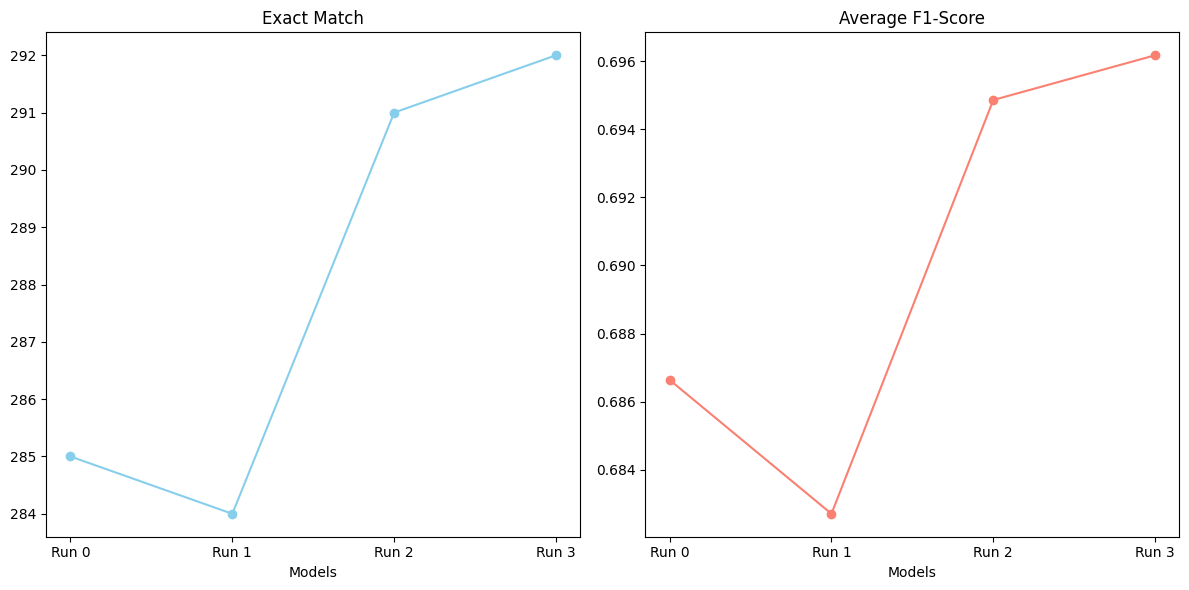

In [ ]:
import matplotlib.pyplot as plt

# Extract values for Exact Match and Average F1-Score
exact_match_values = [lst[1] for lst in performance_list]
f1_score_values = [lst[2] for lst in performance_list]

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Exact Match
base_labels = ["Run 0", "Run 1", "Run 2", "Run 3"]
ax1.plot(base_labels, exact_match_values, color="skyblue",marker='o')
ax1.set_title("Exact Match")
ax1.set_xlabel("Models")

# Plot Average F1-Score
ax2.plot(base_labels, f1_score_values, color="salmon",marker='o')
ax2.set_title("Average F1-Score")
ax2.set_xlabel("Models")

# Add some spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()